# **Series Introduction**

In [ ]:
import pandas as pd

students = ["Ahmet","Barbaros","Kuzey"]

#pandas series numpy arraylerinde tutuluyor
pd.Series(students)# -> 0
                   #0 	Ahmet
                   #1 	Barbaros
                   #2 	Kuzey
                   #dtype: object


numbers = [1,2,3]

pd.Series(numbers) # similar result but dtype: int64

students = ["Alice","Jack",None]
pd.Series(students)# -> 0
                   #0 	Ahmet
                   #1 	Barbaros
                   #2 	None
                   #dtype: object

numbers = [1,2,None]
pd.Series(numbers)# -> 0
                   #0 	1.0
                   #1 	2.0
                   #2 	NaN
                   #dtype: float64

#Öncelikle NaN şeklinde bi sonuç geldi bu Not a Number demek, ayrıca dtype float oldu bunun nedeni pandasın NaN'i float olarak düşünmesi

#NaN ve None aynı şeyler değil, eşitliğine bakarsan False gelir

import numpy as np
np.nan == None # -> False
np.nan == np.nan # -> False

#bir şeyin NaN olup olmadığını anlamak için isnan() fonksiyonu kullanman lazım

np.isnan(np.nan) # -> True

,0
0,1.0
1,2.0
2,NaN


In [ ]:
#liste dışında dictionary ile de series oluşturabilirsin (series genelde labellanmış olur)
#dict ile oluşturduğunda index direkt key olur

students_score = {"Alice":"Physics",
                  "Jack":"Chemistry",
                  "Molly":"English"}

s = pd.Series(students_score)
s
#  	    0
#Alice 	Physics
#Jack 	Chemistry
#Molly 	English
#dtype: object

s.index #Index(['Alice', 'Jack', 'Molly'], dtype='object')
#bu şekilde indexleri öğrenebiliriz

students = [("Alice","Brown"),("Jack","White"),("Molly","Green")]
pd.Series(students)# -> 0
                   #0 	(Alice, Brown)
                   #1 	(Jack, White)
                   #2 	(Molly, Green)
                   #dtype: object

s = pd.Series(["Physics","Chemistry","English"], index = ["Alice","Jack","Molly"])
s
# 	    0
#Alice 	Physics
#Jack 	Chemistry
#Molly 	English
#dtype: object


students_score = {"Alice":"Physics",
                  "Jack":"Chemistry",
                  "Molly":"English"}
s = pd.Series(students_score, index=["Alice","Molly","Sam"])
s
# 	    0
#Alice 	Physics
#Molly 	English
#Sam 	  NaN
#dtype: object

#Jack ile ilgili bir index olmadığı için o yazılmadı ve Sam NaN olarak girildi

,0
Alice,Physics
Molly,English
Sam,NaN


# **Querying a Series**

In [ ]:
import pandas as pd

students_classes ={"Alice":"Physics",
                   "Jack": "Chemistry",
                   "Molly":"English",
                   "Sam":"History"}

s = pd.Series(students_classes)
s
#      	0
#Alice 	Physics
#Jack 	Chemistry
#Molly 	English
#Sam 	  History

#Burada 4. olanı almak istiyosan .iloc[] komudunu kullanarak 3. indextekini alabilirsin
s.iloc[3] # -> History

#Molly'nin hangi sınıfta olduğunu bulmak istiyosan bu sefer .loc[] kullanman gerek
s.loc["Molly"] # -> English

#loc ve iloc method değil attribute bu yüzden köşeli parantez kullanılır

#bu şekilde de ulaşabiliriz
s[3] # -> History
s["Molly"] # -> English



class_code = {99: 'Physics',
              100: 'Chemistry',
              101: 'English',
              102: 'History'}
s = pd.Series(class_code)

s[0] # -> key error geliyor çünkü indexlerimiz 99 100 101 102 gibi sayılar aralarında 0 yok o yüzden burada iloc kullanmalıyız
s.iloc[0] # -> Physics


/tmp/ipython-input-5-1945730995.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[3] # -> History


'Physics'

In [ ]:
grades = pd.Series([90, 80, 70, 60])

total = 0
for grade in grades: # series iterabledır
  total+=grade
print(total/len(grades)) # -> 75.0

# Bu çok yavaş bi yol pandas numpy ile çalıştığı için çok daha kolay yolu var

import numpy as np

total = np.sum(grades)
print(total/len(grades)) # -> 75.0



numbers = pd.Series(np.random.randint(0,1000,10000)) #10000 tane 0 ile 1000 arasında sayı içeren bi series

# head() ile ilk 5 indexteki sayıları alabilirsin
numbers.head()
""" 	0
0 	805
1 	501
2 	510
3 	827
4 	883"""

len(numbers) # 10000

75.0
75.0


10000

In [ ]:
%%timeit -n 100
total = 0
for number in numbers:
  total+=number

total/len(numbers)

# bu şekilde 1 loop 1.07 ms sürmüş

1.07 ms ± 54.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit -n 100
total = np.sum(numbers)
total/len(numbers)

# böyle ise 32.8µs sürmüş

32.8 µs ± 18.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
numbers.head()
""" 	0
0 	380
1 	421
2 	989
3 	949
4 	506"""

# bu şekilde bütün itemları 2 arttırabiliriz
numbers += 2

numbers.head()
""" 	0
0 	382
1 	423
2 	991
3 	951
4 	508"""



,0
0,382
1,423
2,991
3,951
4,508


In [ ]:
#bunu kendimiz yapmak istesek böyle yapardık

for label, value in numbers.items():
  numbers.loc[label] = value+2

numbers.head()
""" 	0
0 	388
1 	429
2 	997
3 	957
4 	514"""

,0
0,388
1,429
2,997
3,957
4,514


In [ ]:
#loc ile hem dataları değiştirebilirsin hem de daha önce olmayan bir veri girebilirsin

s = pd.Series([1,2,3])
s.loc["History"] = 102
s
""" 0
0 	1
1 	2
2 	3
History 	102"""

'0\n0 \t1\n1 \t2\n2 \t3\nHistory \t102'

In [ ]:
students_classes = pd.Series({'Alice': 'Physics',
                   'Jack': 'Chemistry',
                   'Molly': 'English',
                   'Sam': 'History'})
kelly_classes = pd.Series(['Philosophy', 'Arts', 'Math'], index=['Kelly', 'Kelly', 'Kelly'])

#_append ile birleştirebilirsin
all_students_classes = students_classes._append(kelly_classes)
all_students_classes

""" 	0
Alice 	Physics
Jack 	Chemistry
Molly 	English
Sam 	History
Kelly 	Philosophy
Kelly 	Arts
Kelly 	Math"""

#students_classes hala aynı değişmedi

#indexi kelly olanları aratsak yine bir series döner
all_students_classes.loc["Kelly"]
""" 	  0
Kelly 	Philosophy
Kelly 	Arts
Kelly 	Math"""



,0
Kelly,Philosophy
Kelly,Arts
Kelly,Math


# **DataFrame Introduction**

In [ ]:
import pandas as pd

record1 = pd.Series({"Name":"Alice",
                     "Class":"Physics",
                     "Score":85})

record2 = pd.Series({"Name":"Jack",
                     "Class":"Chemistry",
                     "Score":82})

record3 = pd.Series({"Name":"Helen",
                     "Class":"Biology",
                     "Score":90})

df = pd.DataFrame([record1,record2,record3],index = ["school1","school2","school3"])

#head de burada çalışıyor
df.head()
""" 	    Name 	Class 	Score
school1 	Alice 	Physics 	85
school2 	Jack 	Chemistry 	82
school3 	Helen 	Biology 	90"""

' \t    Name \tClass \tScore\nschool1 \tAlice \tPhysics \t85\nschool2 \tJack \tChemistry \t82\nschool3 \tHelen \tBiology \t90'

In [ ]:
#Başka bir yol dictionaryler içeren bir list vermek

students = [{'Name': 'Alice',
              'Class': 'Physics',
              'Score': 85},
            {'Name': 'Jack',
             'Class': 'Chemistry',
             'Score': 82},
            {'Name': 'Helen',
             'Class': 'Biology',
             'Score': 90}]

df = pd.DataFrame(students,index = ["school1","school2","school1"])
df.head()
""" 	    Name 	Class 	Score
school1 	Alice 	Physics 	85
school2 	Jack 	Chemistry 	82
school1 	Helen 	Biology 	90"""

#yine iloc ve loc çalışır, ancak burada 2 boyutlu bir tablo var o yüzden loc'a tek bir değer verirsen sana series verir
df.loc["school2"]
""" 	  school2
Name 	  Jack
Class 	Chemistry
Score 	82"""

#birden çok school1 verisi var o yüzden birden çok şey verecek
df.loc["school1"]
""" 	Name 	Class 	Score
school1 	Alice 	Physics 	85
school1 	Helen 	Biology 	90"""

#bunun typeı da DataFrame

#eğer school1'deki student nameleri almak istiyosam 2 parametre vereceksin
df.loc["school1","Name"]
""" 	    Name
school1 	Alice
school1 	Helen"""


# df.loc["sütun"] key error verir çünkü loc ilk başta satır alır
# tek bir sütunu almak istiyosak bunun için ilk metod satır sütünları değiştirip almak olabilir
# df.T satır sütün değiştirir
df.T.loc["Name"]
""" 	Name
school1 	Alice
school2 	Jack
school1 	Helen"""

# 2. metod
df["Name"]
""" 	Name
school1 	Alice
school2 	Jack
school1 	Helen"""


df.loc["school1"]["Name"] # ilk başta bir DataFrame aldık o DataFramedeki Nameleri aldık (Series aldık en son)
""" 	Name
school1 	Alice
school1 	Helen"""
# bu metod (chaining) eğer df değişirse sıkıntı çıkarabilir


# bütün satırları alıp istediğimiz sütunları alabiliriz
df.loc[:,["Name","Score"]]
""" 	Name 	Score
school1 	Alice 	85
school2 	Jack 	82
school1 	Helen 	90"""

# Nasıl data silinir?
# drop fonksiyonuyla dataları silmek yerine istenilen satırların silindiği yeni bir kopya verilebiir
df.drop("school1")
""" 	Name 	Class 	Score
school2 	Jack 	Chemistry 	82"""

df
""" 	Name 	Class 	Score
school1 	Alice 	Physics 	85
school2 	Jack 	Chemistry 	82
school1 	Helen 	Biology 	90"""

# eğer inplace parametresi True ise orijinal df de değişir, axes parametresi (defaultta 0) 1 yapılırsa bu sefer sütun siler

copy_df = df.copy()
copy_df.drop("Name",inplace=True,axis=1)
copy_df
""" 	Class 	Score
school1 	Physics 	85
school2 	Chemistry 	82
school1 	Biology 	90"""

# başka bir yol del fonksiyonu ama bu direkt kendisinden siliyor, kopya vs oluşturmuyor
del copy_df["Class"]
copy_df
""" 	Score
school1 	85
school2 	82
school1 	90"""

# Yeni satır eklemek için direkt [] kullanabilrisn
df["Class Ranking"] = None #hepsine None girilir
df
""" 	Name 	Class 	Score 	Class Ranking
school1 	Alice 	Physics 	85 	None
school2 	Jack 	Chemistry 	82 	None
school1 	Helen 	Biology 	90 	None"""

Jack


' \tName \tClass \tScore \tClass Ranking\nschool1 \tAlice \tPhysics \t85 \tNone\nschool2 \tJack \tChemistry \t82 \tNone\nschool1 \tHelen \tBiology \t90 \tNone'

In [ ]:
#loc[koşul,sütun listesi] kullanımı örnek
import pandas as pd

data = {
    'Şehir': ['Ankara', 'İstanbul', 'İzmir', 'Ankara', 'İstanbul'],
    'Sıcaklık': [25, 28, 22, 27, 29],
    'Yağış': [True, False, False, True, False]
}
df = pd.DataFrame(data)

filtered_df = df.loc[df['Yağış'] == True, ['Şehir', 'Sıcaklık']]
print(filtered_df)

    Şehir  Sıcaklık
0  Ankara        25
3  Ankara        27


# **DataFrame Indexing and Loading**

In [ ]:
!cat /content/Admission_Predict.csv

Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR ,CGPA,Research,Chance of Admit 
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4,4.5,8.87,1,0.76
3,316,104,3,3,3.5,8,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.8
5,314,103,2,2,3,8.21,0,0.65
6,330,115,5,4.5,3,9.34,1,0.9
7,321,109,3,3,4,8.2,1,0.75
8,308,101,2,3,4,7.9,0,0.68
9,302,102,1,2,1.5,8,0,0.5
10,323,108,3,3.5,3,8.6,0,0.45
11,325,106,3,3.5,4,8.4,1,0.52
12,327,111,4,4,4.5,9,1,0.84
13,328,112,4,4,4.5,9.1,1,0.78
14,307,109,3,4,3,8,1,0.62
15,311,104,3,3.5,2,8.2,1,0.61
16,314,105,3,3.5,2.5,8.3,0,0.54
17,317,107,3,4,3,8.7,0,0.66
18,319,106,3,4,3,8,1,0.65
19,318,110,3,4,3,8.8,0,0.63
20,303,102,3,3.5,3,8.5,0,0.62
21,312,107,3,3,2,7.9,1,0.64
22,325,114,4,3,2,8.4,0,0.7
23,328,116,5,5,5,9.5,1,0.94
24,334,119,5,5,4.5,9.7,1,0.95
25,336,119,5,4,3.5,9.8,1,0.97
26,340,120,5,4.5,4.5,9.6,1,0.94
27,322,109,5,4.5,3.5,8.8,0,0.76
28,298,98,2,1.5,2.5,7.5,1,0.44
29,295,93,1,2,2,7.2,0,0.46
30,310,99,2,1.5,2,7.3,0,0.54
31,300,97,2,3,3,8.1,1,0.65
32,327,103,3,

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Admission_Predict.csv") # bu şekilde kolayca okuyabilirsin

df.head()
""" 	Serial No. 	GRE Score 	TOEFL Score 	University Rating 	SOP 	LOR 	CGPA 	Research 	Chance of Admit
0 	1 	337 	118 	4 	4.5 	4.5 	9.65 	1 	0.92
1 	2 	324 	107 	4 	4.0 	4.5 	8.87 	1 	0.76
2 	3 	316 	104 	3 	3.0 	3.5 	8.00 	1 	0.72
3 	4 	322 	110 	3 	3.5 	2.5 	8.67 	1 	0.80
4 	5 	314 	103 	2 	2.0 	3.0 	8.21 	0 	0.65"""
# görüldüğü gibi pandas yeni bir index tanımlayıp 0'dan başlatmış istersek Serial No'yu index yapabiliriz

df = pd.read_csv("/content/Admission_Predict.csv",index_col=0)
df.head()
""" 	GRE Score 	TOEFL Score 	University Rating 	SOP 	LOR 	CGPA 	Research 	Chance of Admit
Serial No.
1 	337 	118 	4 	4.5 	4.5 	9.65 	1 	0.92
2 	324 	107 	4 	4.0 	4.5 	8.87 	1 	0.76
3 	316 	104 	3 	3.0 	3.5 	8.00 	1 	0.72
4 	322 	110 	3 	3.5 	2.5 	8.67 	1 	0.80
5 	314 	103 	2 	2.0 	3.0 	8.21 	0 	0.65"""

# rename(columns={eski column adı:yeni column adı}) fonksiyonu ile isimleri değiştirebilirsin
new_df = df.rename(columns={"Gre Score":"GRE Score","TOEFL Score":"TOEFL Score","University Rating":"University Rating",
                            "SOP":"Statement of Purpose","LOR":"Letter of Recommendation","CGPA":"CGPA",
                            "Research":"Research","Chance of Admit":"Chance of Admit"})
new_df
""" 	GRE Score 	TOEFL Score 	University Rating 	Statement of Purpose 	LOR 	CGPA 	Research 	Chance of Admit
Serial No.
1 	337 	118 	4 	4.5 	4.5 	9.65 	1 	0.92
2 	324 	107 	4 	4.0 	4.5 	8.87 	1 	0.76
3 	316 	104 	3 	3.0 	3.5 	8.00 	1 	0.72
4 	322 	110 	3 	3.5 	2.5 	8.67 	1 	0.80
5 	314 	103 	2 	2.0 	3.0 	8.21 	0 	0.65"""

#SOP değişti ama LOR değişmedi neden?
new_df.columns
"""Index(['GRE Score', 'TOEFL Score', 'University Rating', 'Statement of Purpose',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')"""
# görüldüğü gibi LOR'dan sonra boşluk var

new_df = new_df.rename(columns={"LOR ":"Letter of Recommendation","Chance of Admit ":"Chance of Admit"})
new_df.head()
""" 	GRE Score 	TOEFL Score 	University Rating 	Statement of Purpose 	Letter of Recommendation 	CGPA 	Research 	Chance of Admit
Serial No.
1 	337 	118 	4 	4.5 	4.5 	9.65 	1 	0.92
2 	324 	107 	4 	4.0 	4.5 	8.87 	1 	0.76
3 	316 	104 	3 	3.0 	3.5 	8.00 	1 	0.72
4 	322 	110 	3 	3.5 	2.5 	8.67 	1 	0.80
5 	314 	103 	2 	2.0 	3.0 	8.21 	0 	0.65"""

# bu baştaki veya sondaki boşlukları kaldırmanın başka bir yolu
new_df = new_df.rename(mapper=str., axis="columns")

# column isimlerini değiştirmenin daha kolay yolu
cols = list(df.columns)
cols = [x.lower().strip() for x in cols]
df.columns = cols

df.head()
""" 	 	gre score 	toefl score 	university rating 	sop 	lor 	cgpa 	research 	chance of admit
Serial No.
1 	337 	118 	4 	4.5 	4.5 	9.65 	1 	0.92
2 	324 	107 	4 	4.0 	4.5 	8.87 	1 	0.76
3 	316 	104 	3 	3.0 	3.5 	8.00 	1 	0.72
4 	322 	110 	3 	3.5 	2.5 	8.67 	1 	0.80
5 	314 	103 	2 	2.0 	3.0 	8.21 	0 	0.65"""

,gre score,toefl score,university rating,sop,lor,cgpa,research,chance of admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


# **Querying and Indexing a DataFrame**

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Admission_Predict.csv",index_col = 0)
df.columns = [x.lower().strip() for x in df.columns]
df.head()
""" 	gre score 	toefl score 	university rating 	sop 	lor 	cgpa 	research 	chance of admit
Serial No.
1 	337 	118 	4 	4.5 	4.5 	9.65 	1 	0.92
2 	324 	107 	4 	4.0 	4.5 	8.87 	1 	0.76
3 	316 	104 	3 	3.0 	3.5 	8.00 	1 	0.72
4 	322 	110 	3 	3.5 	2.5 	8.67 	1 	0.80
5 	314 	103 	2 	2.0 	3.0 	8.21 	0 	0.65"""

#METOD1: Boolean Masking kullanarak chance of admit > 0.7 olanları alabiliriz
admit_mask = df["chance of admit"] > 0.7
#admit_mask'e bakmak istersek 400 tane True veya False içeren veri görürüz

#istenmeyen (yani False veren) sonuçları kapatabiliriz

df.where(admit_mask).head()
""" 	gre score 	toefl score 	university rating 	sop 	lor 	cgpa 	research 	chance of admit
Serial No.
1 	337.0 	118.0 	4.0 	4.5 	4.5 	9.65 	1.0 	0.92
2 	324.0 	107.0 	4.0 	4.0 	4.5 	8.87 	1.0 	0.76
3 	316.0 	104.0 	3.0 	3.0 	3.5 	8.00 	1.0 	0.72
4 	322.0 	110.0 	3.0 	3.5 	2.5 	8.67 	1.0 	0.80
5 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN 	NaN"""
#son verinin chance of admit değeri 0.7'den küçük olduğu için bütün verileri NaN olarak değişti

#Bu NaN'leri silmek için dropna() fonksiyonu var
df.where(admit_mask).dropna().head()
""" 	gre score 	toefl score 	university rating 	sop 	lor 	cgpa 	research 	chance of admit
Serial No.
1 	337.0 	118.0 	4.0 	4.5 	4.5 	9.65 	1.0 	0.92
2 	324.0 	107.0 	4.0 	4.0 	4.5 	8.87 	1.0 	0.76
3 	316.0 	104.0 	3.0 	3.0 	3.5 	8.00 	1.0 	0.72
4 	322.0 	110.0 	3.0 	3.5 	2.5 	8.67 	1.0 	0.80
6 	330.0 	115.0 	5.0 	4.5 	3.0 	9.34 	1.0 	0.90"""
#böyle yapınca fark ettiysen serial no 6'dan devam ediyor

#METOD 2: Indexing Operatorla yapmak
df[df["chance of admit"]>0.7].head()
""" 	gre score 	toefl score 	university rating 	sop 	lor 	cgpa 	research 	chance of admit
Serial No.
1 	337.0 	118.0 	4.0 	4.5 	4.5 	9.65 	1.0 	0.92
2 	324.0 	107.0 	4.0 	4.0 	4.5 	8.87 	1.0 	0.76
3 	316.0 	104.0 	3.0 	3.0 	3.5 	8.00 	1.0 	0.72
4 	322.0 	110.0 	3.0 	3.5 	2.5 	8.67 	1.0 	0.80
6 	330.0 	115.0 	5.0 	4.5 	3.0 	9.34 	1.0 	0.90"""
#bu şekilde hem  dropna hem where yapılmış oldu

df["gre score"].head()
""" 	gre score
Serial No.
1 	337
2 	324
3 	316
4 	322
5 	314"""

df[["gre score","toefl score"]].head()
""" 	gre score 	toefl score
Serial No.
1 	337 	118
2 	324 	107
3 	316 	104
4 	322 	110
5 	314 	103"""

df[df["gre score"] > 320].head()
""" 	gre score 	toefl score 	university rating 	sop 	lor 	cgpa 	research 	chance of admit
Serial No.
1 	337 	118 	4 	4.5 	4.5 	9.65 	1 	0.92
2 	324 	107 	4 	4.0 	4.5 	8.87 	1 	0.76
4 	322 	110 	3 	3.5 	2.5 	8.67 	1 	0.80
6 	330 	115 	5 	4.5 	3.0 	9.34 	1 	0.90
7 	321 	109 	3 	3.0 	4.0 	8.20 	1 	0.75"""

#birden çok boolean masking nasıl yapabiliriz? & and anlamında | or anlamında
(df["chance of admit"] > 0.7) & (df["chance of admit"] < 0.9) # parantez koymak önemli

#alternatif built-in func
df["chance of admit"].gt(0.7) & df["chance of admit"].lt(0.9)
#df["chance of admit"].gt(0.7).lt(0.9) bu da olur

""" 	chance of admit
Serial No.
1 	False
2 	True
3 	True
4 	True
5 	False
... 	...
396 	True
397 	True
398 	False
399 	False
400 	False"""




' \tchance of admit\nSerial No. \t\n1 \tFalse\n2 \tTrue\n3 \tTrue\n4 \tTrue\n5 \tFalse\n... \t...\n396 \tTrue\n397 \tTrue\n398 \tFalse\n399 \tFalse\n400 \tFalse'

In [ ]:
#multi-level indexing
import pandas as pd
df = pd.read_csv("/content/census.csv")
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [ ]:
import pandas as pd
df = pd.read_csv("/content/Admission_Predict.csv",index_col = 0)
df.columns = [x.lower().strip() for x in df.columns]

#diyelim ki chance of admit'i index yapamk istiyoruz
df["serial number"] = df.index #serial number column olarak kalsın
df = df.set_index("chance of admit")
df.head()
""" 	gre score 	toefl score 	university rating 	sop 	lor 	cgpa 	research 	serial number
chance of admit
0.92 	337 	118 	4 	4.5 	4.5 	9.65 	1 	1
0.76 	324 	107 	4 	4.0 	4.5 	8.87 	1 	2
0.72 	316 	104 	3 	3.0 	3.5 	8.00 	1 	3
0.80 	322 	110 	3 	3.5 	2.5 	8.67 	1 	4
0.65 	314 	103 	2 	2.0 	3.0 	8.21 	0 	5"""

#eğer default bi indexleme yapmak istiyosak reset_index()
df = df.reset_index()
df.head()
""" 	chance of admit 	gre score 	toefl score 	university rating 	sop 	lor 	cgpa 	research 	serial number
0 	0.92 	337 	118 	4 	4.5 	4.5 	9.65 	1 	1
1 	0.76 	324 	107 	4 	4.0 	4.5 	8.87 	1 	2
2 	0.72 	316 	104 	3 	3.0 	3.5 	8.00 	1 	3
3 	0.80 	322 	110 	3 	3.5 	2.5 	8.67 	1 	4
4 	0.65 	314 	103 	2 	2.0 	3.0 	8.21 	0 	5"""
#chance of admit hala duruyor yeni bi sütun oldu 0dan başlayan

,chance of admit,gre score,toefl score,university rating,sop,lor,cgpa,research,serial number
0,0.92,337,118,4,4.5,4.5,9.65,1,1
1,0.76,324,107,4,4.0,4.5,8.87,1,2
2,0.72,316,104,3,3.0,3.5,8.00,1,3
3,0.80,322,110,3,3.5,2.5,8.67,1,4
4,0.65,314,103,2,2.0,3.0,8.21,0,5


In [ ]:
df["SUMLEV"].unique() #-> array([40, 50])

df = df[df["SUMLEV"] == 50] #SUMLEV'i 50 olanları aldık sadece


In [ ]:
columns_to_keep = ["STNAME","CTYNAME","BIRTHS2010","BIRTHS2011","POPESTIMATE2010","POPESTIMATE2011"]
df = df[columns_to_keep]
df.head()

,STNAME,CTYNAME,BIRTHS2010,BIRTHS2011,POPESTIMATE2010,POPESTIMATE2011
0,Alabama,Alabama,14226,59689,4785161,4801108
1,Alabama,Autauga County,151,636,54660,55253
2,Alabama,Baldwin County,517,2187,183193,186659
3,Alabama,Barbour County,70,335,27341,27226
4,Alabama,Bibb County,44,266,22861,22733


In [ ]:
df = df.set_index(["STNAME","CTYNAME"]) #ikisini birden index yaptık, burada sırası önemli STNAME kapsayıcı olduğu için önce yazıldı
df.head()

BIRTHS2010  BIRTHS2011  POPESTIMATE2010  \
STNAME  CTYNAME                                                   
Alabama Alabama              14226       59689          4785161   
        Autauga County         151         636            54660   
        Baldwin County         517        2187           183193   
        Barbour County          70         335            27341   
        Bibb County             44         266            22861   

                        POPESTIMATE2011  
STNAME  CTYNAME                          
Alabama Alabama                 4801108  
        Autauga County            55253  
        Baldwin County           186659  
        Barbour County            27226  
        Bibb County               22733

In [ ]:
df.loc["Michigan","Washtenaw County"]

/tmp/ipython-input-32-3724480356.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc["Michigan","Washtenaw County"]


,,BIRTHS2010,BIRTHS2011,POPESTIMATE2010,POPESTIMATE2011
STNAME,CTYNAME,,,,
Michigan,Washtenaw County,977,3826,345563,349048


In [ ]:
df.loc[ [("Michigan","Washtenaw County"),
         ("Michigan","Wayne County")] ] #birden fazla almak için

BIRTHS2010  BIRTHS2011  POPESTIMATE2010  \
STNAME   CTYNAME                                                     
Michigan Washtenaw County         977        3826           345563   
         Wayne County            5918       23819          1815199   

                           POPESTIMATE2011  
STNAME   CTYNAME                            
Michigan Washtenaw County           349048  
         Wayne County              1801273

# **Missing Values**

In [ ]:
import pandas as pd

#read_csv'nin aldığı na_values parametresi olmayan veriler için ne yazılacağını yazmak için kullanılabilir

df = pd.read_csv("/content/class_grades.csv")
df.head(10)

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,NaN,63.15,48.89
3,7,NaN,NaN,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89
5,7,95.00,92.58,93.12,97.78,68.06
6,8,95.05,102.99,56.25,99.07,50.00
7,7,72.85,86.85,60.00,NaN,56.11
8,8,84.26,93.10,47.50,18.52,50.83
9,7,90.10,97.55,51.25,88.89,63.61


In [ ]:
#isnull() ile boş mu değil mi öğrenebiliriz
mask = df.isnull()
mask.head(10)

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,True,False,False
3,False,True,True,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,True,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [ ]:
df.dropna().head(10)
# 2 3 7. satırlar gitmiş

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
4,8,91.32,93.64,95.00,107.41,73.89
5,7,95.00,92.58,93.12,97.78,68.06
6,8,95.05,102.99,56.25,99.07,50.00
8,8,84.26,93.10,47.50,18.52,50.83
9,7,90.10,97.55,51.25,88.89,63.61
10,7,80.44,90.20,75.00,91.48,39.72
12,8,97.16,103.71,72.50,93.52,63.33
13,7,91.28,83.53,81.25,99.81,92.22


In [ ]:
df.fillna(0,inplace=True) #boş olan veriler yerine 0 girildi ve bu orj df'te de geçerli
df.head(10)

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,0.00,63.15,48.89
3,7,0.00,0.00,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89
5,7,95.00,92.58,93.12,97.78,68.06
6,8,95.05,102.99,56.25,99.07,50.00
7,7,72.85,86.85,60.00,0.00,56.11
8,8,84.26,93.10,47.50,18.52,50.83
9,7,90.10,97.55,51.25,88.89,63.61


In [ ]:
df = pd.read_csv("/content/log.csv")
df.head(20)

,time,user,video,playback position,paused,volume
0,1469974424,cheryl,intro.html,5,False,10.0
1,1469974454,cheryl,intro.html,6,NaN,NaN
2,1469974544,cheryl,intro.html,9,NaN,NaN
3,1469974574,cheryl,intro.html,10,NaN,NaN
4,1469977514,bob,intro.html,1,NaN,NaN
5,1469977544,bob,intro.html,1,NaN,NaN
6,1469977574,bob,intro.html,1,NaN,NaN
7,1469977604,bob,intro.html,1,NaN,NaN
8,1469974604,cheryl,intro.html,11,NaN,NaN
9,1469974694,cheryl,intro.html,14,NaN,NaN


In [ ]:
df = df.set_index("time")
df = df.sort_index()
df.head(20)

,user,video,playback position,paused,volume
time,,,,,
1469974424,cheryl,intro.html,5,False,10.0
1469974424,sue,advanced.html,23,False,10.0
1469974454,sue,advanced.html,24,NaN,NaN
1469974454,cheryl,intro.html,6,NaN,NaN
1469974484,cheryl,intro.html,7,NaN,NaN
1469974514,cheryl,intro.html,8,NaN,NaN
1469974524,sue,advanced.html,25,NaN,NaN
1469974544,cheryl,intro.html,9,NaN,NaN
1469974554,sue,advanced.html,26,NaN,NaN


In [ ]:
df = df.reset_index()
df = df.set_index(["time","user"])
df.head(20)

video  playback position paused  volume
time       user                                                   
1469974424 cheryl     intro.html                  5  False    10.0
           sue     advanced.html                 23  False    10.0
1469974454 sue     advanced.html                 24    NaN     NaN
           cheryl     intro.html                  6    NaN     NaN
1469974484 cheryl     intro.html                  7    NaN     NaN
1469974514 cheryl     intro.html                  8    NaN     NaN
1469974524 sue     advanced.html                 25    NaN     NaN
1469974544 cheryl     intro.html                  9    NaN     NaN
1469974554 sue     advanced.html                 26    NaN     NaN
1469974574 cheryl     intro.html                 10    NaN     NaN
1469974604 cheryl     intro.html                 11    NaN     NaN
1469974624 sue     advanced.html                 27    NaN     NaN
1469974634 cheryl     intro.html                 12    NaN     NaN
1469974654 sue     advanced.html                 28    NaN     5.0
1469974664 cheryl     intro.html                 13    NaN     NaN
1469974694 cheryl     intro.html                 14    NaN     NaN
1469974724 cheryl     intro.html                 15    NaN     NaN
           sue     advanced.html                 29    NaN     NaN
1469974754 sue     advanced.html                 30    NaN     NaN
1469974824 sue     advanced.html                 31    NaN     NaN

In [ ]:
df = df.ffill() #önceden bi False gördü NaN dışında bişey görene kadar False yapıyor, daha net anlamak için tabloları karşılaştır
df.head(20)

video  playback position  paused  volume
time       user                                                    
1469974424 cheryl     intro.html                  5   False    10.0
           sue     advanced.html                 23   False    10.0
1469974454 sue     advanced.html                 24   False    10.0
           cheryl     intro.html                  6   False    10.0
1469974484 cheryl     intro.html                  7   False    10.0
1469974514 cheryl     intro.html                  8   False    10.0
1469974524 sue     advanced.html                 25   False    10.0
1469974544 cheryl     intro.html                  9   False    10.0
1469974554 sue     advanced.html                 26   False    10.0
1469974574 cheryl     intro.html                 10   False    10.0
1469974604 cheryl     intro.html                 11   False    10.0
1469974624 sue     advanced.html                 27   False    10.0
1469974634 cheryl     intro.html                 12   False    10.0
1469974654 sue     advanced.html                 28   False     5.0
1469974664 cheryl     intro.html                 13   False     5.0
1469974694 cheryl     intro.html                 14   False     5.0
1469974724 cheryl     intro.html                 15   False     5.0
           sue     advanced.html                 29   False     5.0
1469974754 sue     advanced.html                 30   False     5.0
1469974824 sue     advanced.html                 31   False     5.0

In [ ]:
# DATALARI DEĞİŞTİRME
df = pd.DataFrame({'a': [1, 1, 2, 3, 4],
                   'b': [3, 6, 3, 8, 9],
                   'c': ['a', 'b', 'c', 'd', 'e']})
df

NameError: name 'pd' is not defined

In [ ]:
# value-to-value approach (bütün 1'leri 100 yap)
df.replace(1,100)


,A,B,C
0,100,3,a
1,100,6,b
2,2,3,c
3,3,8,d
4,4,9,e


In [ ]:
df.replace([1,3],[100,300]) #birden çok veriyi aynı anda değiştirebbiliriz

,A,B,C
0,100,300,a
1,100,6,b
2,2,300,c
3,300,8,d
4,4,9,e


In [ ]:
df = pd.read_csv("/content/log.csv")
df.head(20)

,time,user,video,playback position,paused,volume
0,1469974424,cheryl,intro.html,5,False,10.0
1,1469974454,cheryl,intro.html,6,NaN,NaN
2,1469974544,cheryl,intro.html,9,NaN,NaN
3,1469974574,cheryl,intro.html,10,NaN,NaN
4,1469977514,bob,intro.html,1,NaN,NaN
5,1469977544,bob,intro.html,1,NaN,NaN
6,1469977574,bob,intro.html,1,NaN,NaN
7,1469977604,bob,intro.html,1,NaN,NaN
8,1469974604,cheryl,intro.html,11,NaN,NaN
9,1469974694,cheryl,intro.html,14,NaN,NaN


In [ ]:
#REGEX kullanarak değiştirme
df.replace(to_replace=".*.html$",value="webpage",regex=True) #.html ile biten'leri webpage yap

NameError: name 'df' is not defined

# **Manipulating Example**

In [ ]:
import pandas as pd
df = pd.read_csv("/content/presidents.csv")
df.head()

,#,President,Born,Age atstart of presidency,Age atend of presidency,Post-presidencytimespan,Died,Age
0,1,George Washington,"Feb 22, 1732[a]","57 years, 67 daysApr 30, 1789","65 years, 10 daysMar 4, 1797","2 years, 285 days","Dec 14, 1799","67 years, 295 days"
1,2,John Adams,"Oct 30, 1735[a]","61 years, 125 daysMar 4, 1797","65 years, 125 daysMar 4, 1801","25 years, 122 days","Jul 4, 1826","90 years, 247 days"
2,3,Thomas Jefferson,"Apr 13, 1743[a]","57 years, 325 daysMar 4, 1801","65 years, 325 daysMar 4, 1809","17 years, 122 days","Jul 4, 1826","83 years, 82 days"
3,4,James Madison,"Mar 16, 1751[a]","57 years, 353 daysMar 4, 1809","65 years, 353 daysMar 4, 1817","19 years, 116 days","Jun 28, 1836","85 years, 104 days"
4,5,James Monroe,"Apr 28, 1758","58 years, 310 daysMar 4, 1817","66 years, 310 daysMar 4, 1825","6 years, 122 days","Jul 4, 1831","73 years, 67 days"


In [ ]:
#President sütunu isim soyisim diye iki ayrı sütunda yapmak istedik
df["First"] = df["President"]
df["First"] = df["First"].replace("[ ].*", "",regex=True) #boşluktan sonra gelenleri sildi
df.head()

,#,President,Born,Age atstart of presidency,Age atend of presidency,Post-presidencytimespan,Died,Age,First
0,1,George Washington,"Feb 22, 1732[a]","57 years, 67 daysApr 30, 1789","65 years, 10 daysMar 4, 1797","2 years, 285 days","Dec 14, 1799","67 years, 295 days",George
1,2,John Adams,"Oct 30, 1735[a]","61 years, 125 daysMar 4, 1797","65 years, 125 daysMar 4, 1801","25 years, 122 days","Jul 4, 1826","90 years, 247 days",John
2,3,Thomas Jefferson,"Apr 13, 1743[a]","57 years, 325 daysMar 4, 1801","65 years, 325 daysMar 4, 1809","17 years, 122 days","Jul 4, 1826","83 years, 82 days",Thomas
3,4,James Madison,"Mar 16, 1751[a]","57 years, 353 daysMar 4, 1809","65 years, 353 daysMar 4, 1817","19 years, 116 days","Jun 28, 1836","85 years, 104 days",James
4,5,James Monroe,"Apr 28, 1758","58 years, 310 daysMar 4, 1817","66 years, 310 daysMar 4, 1825","6 years, 122 days","Jul 4, 1831","73 years, 67 days",James


In [ ]:
del(df["First"])

#apply() ile de benzer iş yapılabilir
def splitname(row):
  row["First"] = row["President"].split(" ")[0]
  row["Last"] = row["President"].split(" ")[-1]
  return row

df = df.apply(splitname,axis="columns") #ilk parametre olarak hangi fonk uygulanacaksa onu alır
df.head()

,#,President,Born,Age atstart of presidency,Age atend of presidency,Post-presidencytimespan,Died,Age,First,Last
0,1,George Washington,"Feb 22, 1732[a]","57 years, 67 daysApr 30, 1789","65 years, 10 daysMar 4, 1797","2 years, 285 days","Dec 14, 1799","67 years, 295 days",George,Washington
1,2,John Adams,"Oct 30, 1735[a]","61 years, 125 daysMar 4, 1797","65 years, 125 daysMar 4, 1801","25 years, 122 days","Jul 4, 1826","90 years, 247 days",John,Adams
2,3,Thomas Jefferson,"Apr 13, 1743[a]","57 years, 325 daysMar 4, 1801","65 years, 325 daysMar 4, 1809","17 years, 122 days","Jul 4, 1826","83 years, 82 days",Thomas,Jefferson
3,4,James Madison,"Mar 16, 1751[a]","57 years, 353 daysMar 4, 1809","65 years, 353 daysMar 4, 1817","19 years, 116 days","Jun 28, 1836","85 years, 104 days",James,Madison
4,5,James Monroe,"Apr 28, 1758","58 years, 310 daysMar 4, 1817","66 years, 310 daysMar 4, 1825","6 years, 122 days","Jul 4, 1831","73 years, 67 days",James,Monroe


In [ ]:
del(df["First"])
del(df["Last"])

#()  ile isimleri çekmek
pattern="(?P<First>^[\w]*)(?:.* )(?P<Last>[\w]*$)" #(bir kelime) (herhangi başka şeyler ve boşluk ve bu dönülmesin) (bir kelime)
names = df["President"].str.extract(pattern)
names.head()

,First,Last
0,George,Washington
1,John,Adams
2,Thomas,Jefferson
3,James,Madison
4,James,Monroe


In [ ]:
df["First"] = names["First"]
df["Last"] = names["Last"]
df.head()

,#,President,Born,Age atstart of presidency,Age atend of presidency,Post-presidencytimespan,Died,Age,First,Last
0,1,George Washington,"Feb 22, 1732[a]","57 years, 67 daysApr 30, 1789","65 years, 10 daysMar 4, 1797","2 years, 285 days","Dec 14, 1799","67 years, 295 days",George,Washington
1,2,John Adams,"Oct 30, 1735[a]","61 years, 125 daysMar 4, 1797","65 years, 125 daysMar 4, 1801","25 years, 122 days","Jul 4, 1826","90 years, 247 days",John,Adams
2,3,Thomas Jefferson,"Apr 13, 1743[a]","57 years, 325 daysMar 4, 1801","65 years, 325 daysMar 4, 1809","17 years, 122 days","Jul 4, 1826","83 years, 82 days",Thomas,Jefferson
3,4,James Madison,"Mar 16, 1751[a]","57 years, 353 daysMar 4, 1809","65 years, 353 daysMar 4, 1817","19 years, 116 days","Jun 28, 1836","85 years, 104 days",James,Madison
4,5,James Monroe,"Apr 28, 1758","58 years, 310 daysMar 4, 1817","66 years, 310 daysMar 4, 1825","6 years, 122 days","Jul 4, 1831","73 years, 67 days",James,Monroe


In [ ]:
#Born'da bazılarının sonunda [a] var onu kaldıracağız
df["Born"] = df["Born"].str.extract("([\w]{3} [\w]{1,2}, [\w]{4})")
df.head()

,#,President,Born,Age atstart of presidency,Age atend of presidency,Post-presidencytimespan,Died,Age,First,Last
0,1,George Washington,"Feb 22, 1732","57 years, 67 daysApr 30, 1789","65 years, 10 daysMar 4, 1797","2 years, 285 days","Dec 14, 1799","67 years, 295 days",George,Washington
1,2,John Adams,"Oct 30, 1735","61 years, 125 daysMar 4, 1797","65 years, 125 daysMar 4, 1801","25 years, 122 days","Jul 4, 1826","90 years, 247 days",John,Adams
2,3,Thomas Jefferson,"Apr 13, 1743","57 years, 325 daysMar 4, 1801","65 years, 325 daysMar 4, 1809","17 years, 122 days","Jul 4, 1826","83 years, 82 days",Thomas,Jefferson
3,4,James Madison,"Mar 16, 1751","57 years, 353 daysMar 4, 1809","65 years, 353 daysMar 4, 1817","19 years, 116 days","Jun 28, 1836","85 years, 104 days",James,Madison
4,5,James Monroe,"Apr 28, 1758","58 years, 310 daysMar 4, 1817","66 years, 310 daysMar 4, 1825","6 years, 122 days","Jul 4, 1831","73 years, 67 days",James,Monroe


In [ ]:
#bunu satırı datetime objesi yapabiliriz
df["Born"] = pd.to_datetime(df["Born"])
df.head()

,#,President,Born,Age atstart of presidency,Age atend of presidency,Post-presidencytimespan,Died,Age,First,Last,Age at start of presidency,Date at start of presidency
0,1,George Washington,1732-02-22,"57 years, 67 daysApr 30, 1789","65 years, 10 daysMar 4, 1797","2 years, 285 days","Dec 14, 1799","67 years, 295 days",George,Washington,"57 years, 67 days","Apr 30, 1789"
1,2,John Adams,1735-10-30,"61 years, 125 daysMar 4, 1797","65 years, 125 daysMar 4, 1801","25 years, 122 days","Jul 4, 1826","90 years, 247 days",John,Adams,"61 years, 125 days","Mar 4, 1797"
2,3,Thomas Jefferson,1743-04-13,"57 years, 325 daysMar 4, 1801","65 years, 325 daysMar 4, 1809","17 years, 122 days","Jul 4, 1826","83 years, 82 days",Thomas,Jefferson,"57 years, 325 days","Mar 4, 1801"
3,4,James Madison,1751-03-16,"57 years, 353 daysMar 4, 1809","65 years, 353 daysMar 4, 1817","19 years, 116 days","Jun 28, 1836","85 years, 104 days",James,Madison,"57 years, 353 days","Mar 4, 1809"
4,5,James Monroe,1758-04-28,"58 years, 310 daysMar 4, 1817","66 years, 310 daysMar 4, 1825","6 years, 122 days","Jul 4, 1831","73 years, 67 days",James,Monroe,"58 years, 310 days","Mar 4, 1817"


# **Merging DataFrames**

## pd.merge() kullanımı

Students ve staff diye iki set olsun, bazıları sadece student bazıları sadece staff bazıları ise hem staff hem student
bunların union'ını almaya "full outer join" diyoruz.
Hem student hem de staff olanlara ise intersection denir bunun karşılığı da "inner join"

In [ ]:
import pandas as pd

# First we create two DataFrames, staff and students.
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])

staff_df = staff_df.set_index('Name')
# Now we'll create a student dataframe
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index("Name")

#James and Sally kesişim kümesinde ama Kelly sadece staff Mike ise sadece student

#union almak için merge() yani outer join
pd.merge(staff_df,student_df,how="outer",left_index=True,right_index=True)


,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [ ]:
#intersection için how attribute inner olmalı
pd.merge(staff_df,student_df,how="inner",left_index=True,right_index=True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [ ]:
#left join ile staff kümesiyle ilgili bilgileri (hem student hem de staff bilgilerini) alabiliriz
pd.merge(staff_df,student_df,how="left",left_index=True,right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [ ]:
#right join de aynı
pd.merge(staff_df,student_df,how="right",left_index=True,right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [ ]:
#sadece indexlere göre değil herhangi bir seçili columna göre de indexleme yapılabilir
#indexleme yapılacak column on attribute'una verilmeli
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()

pd.merge(staff_df,student_df,how="right",on="Name")

,Name,Role,School
0,James,Grader,Business
1,Mike,NaN,Law
2,Sally,Course liasion,Engineering


In [ ]:
#Dfler arasında bir uyuşmazlık olursa ne olur?
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR',
                          'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion',
                          'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader',
                          'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business',
                            'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law',
                            'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering',
                            'Location': '512 Wilson Crescent'}])
#stafflarda location bilgisi ofis location, studentlarda home location

pd.merge(staff_df,student_df,how="left",on="Name")
#staff location_x şeklinde, student location ise location_y şeklinde

,Name,Role,Location_x,School,Location_y
0,Kelly,Director of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue


In [ ]:
#multi-indexing
#mesela ilk isimler çakışır ancak ikinci ismler farklıdır, o zaman bizim bunları joinlememiz için 2 column lazım
#bunu on attribute'una list vererek yapıyoruz

staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins',
                          'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks',
                          'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde',
                          'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond',
                            'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith',
                            'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks',
                            'School': 'Engineering'}])
#Aslında 2 james var ama biz first name'e göre sıralarsak 1 tane varmış gibi olucak

pd.merge(staff_df,student_df,how="outer",on=["First Name","Last Name"])

,First Name,Last Name,Role,School
0,James,Hammond,NaN,Business
1,James,Wilde,Grader,NaN
2,Kelly,Desjardins,Director of HR,NaN
3,Mike,Smith,NaN,Law
4,Sally,Brooks,Course liasion,Engineering


## pd.concat() kullanımı

```
pd.concat([df1,df2,df3],keys*=["idx1","idx2","idx3"])
```
*opsiyonel

Verileri dikey olarak birleştirme yapar, yani daha fazla satır eklemek gibi düşünebilirsin

In [ ]:
#farz edelim bir şirket için 3 çeyrek verileri ayrı ayrı duruyor

# 2023 1. Çeyrek Satış Verileri
data_q1 = {
    'Bölge': ['Kuzey', 'Güney', 'Doğu', 'Batı'],
    'Ürün': ['A', 'B', 'C', 'A'],
    'Satış Miktarı': [100, 150, 80, 120],
    'Gelir': [10000, 18000, 7000, 13000]
}
df_q1 = pd.DataFrame(data_q1)

# 2023 2. Çeyrek Satış Verileri
data_q2 = {
    'Bölge': ['Kuzey', 'Güney', 'Doğu', 'Batı'],
    'Ürün': ['B', 'A', 'C', 'B'],
    'Satış Miktarı': [110, 160, 90, 130],
    'Gelir': [12000, 20000, 8000, 15000]
}
df_q2 = pd.DataFrame(data_q2)

# 2023 3. Çeyrek Satış Verileri
data_q3 = {
    'Bölge': ['Kuzey', 'Güney', 'Doğu', 'Batı'],
    'Ürün': ['C', 'B', 'A', 'C'],
    'Satış Miktarı': [95, 140, 100, 115],
    'Gelir': [9000, 17000, 11000, 12500]
}
df_q3 = pd.DataFrame(data_q3)

# Veri çerçevelerini bir listeye alalım
quarterly_frames = [df_q1, df_q2, df_q3]

# Concat fonksiyonu ile birleştirme yapalım
all_quarters_sales = pd.concat(quarterly_frames)
all_quarters_sales

,Bölge,Ürün,Satış Miktarı,Gelir
0,Kuzey,A,100,10000
1,Güney,B,150,18000
2,Doğu,C,80,7000
3,Batı,A,120,13000
0,Kuzey,B,110,12000
1,Güney,A,160,20000
2,Doğu,C,90,8000
3,Batı,B,130,15000
0,Kuzey,C,95,9000
1,Güney,B,140,17000


In [ ]:
#ama burada hangisi hangi çeyrek bilmiyoruz
#bunun için keys parametresini kullanıcaz

# Her bir kaydın hangi çeyrekten geldiğini belirtmek için 'keys' parametresini kullanalım
all_quarters_sales_with_keys = pd.concat(quarterly_frames, keys=['2023-Q1', '2023-Q2', '2023-Q3'])

all_quarters_sales_with_keys

Bölge Ürün  Satış Miktarı  Gelir
2023-Q1 0  Kuzey    A            100  10000
        1  Güney    B            150  18000
        2   Doğu    C             80   7000
        3   Batı    A            120  13000
2023-Q2 0  Kuzey    B            110  12000
        1  Güney    A            160  20000
        2   Doğu    C             90   8000
        3   Batı    B            130  15000
2023-Q3 0  Kuzey    C             95   9000
        1  Güney    B            140  17000
        2   Doğu    A            100  11000
        3   Batı    C            115  12500

In [ ]:
# Ürün Maliyet Verilerini de Merge ile ekleyebilirz
#yani ürüne göre birim maliyetini de ekledik
product_costs = {
    'Ürün': ['A', 'B', 'C', 'D'], # 'D' ürünü satış verilerinde yok
    'Birim Maliyet': [50, 60, 45, 70]
}
df_product_costs = pd.DataFrame(product_costs)

merged_sales_costs = pd.merge(all_quarters_sales, df_product_costs, on='Ürün')
merged_sales_costs

,Bölge,Ürün,Satış Miktarı,Gelir,Birim Maliyet
0,Kuzey,A,100,10000,50
1,Güney,B,150,18000,60
2,Doğu,C,80,7000,45
3,Batı,A,120,13000,50
4,Kuzey,B,110,12000,60
5,Güney,A,160,20000,50
6,Doğu,C,90,8000,45
7,Batı,B,130,15000,60
8,Kuzey,C,95,9000,45
9,Güney,B,140,17000,60


# **Pandas Idioms**

In [ ]:
import pandas as pd
import numpy as np
import timeit

df = pd.read_csv("/content/census.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/census.csv'

## Method Chaining
Her bir method yeni bir obje döndürür, mesela
```
df["STNAME"].apply(get_state_region)
```
bir obje döndürür. Bunun üzerine başka method da uygulayabiliriz.


In [ ]:
(df.where(df["SUMLEV"]==50)
  .dropna()
  .set_index(["STNAME","CTYNAME"])
  .rename(columns={"ESTIMATESBASE2010":"Estimates Base 2010"}))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County       50.0     3.0       6.0    1.0     1.0   
        Baldwin County       50.0     3.0       6.0    1.0     3.0   
        Barbour County       50.0     3.0       6.0    1.0     5.0   
        Bibb County          50.0     3.0       6.0    1.0     7.0   
        Blount County        50.0     3.0       6.0    1.0     9.0   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County    50.0     4.0       8.0   56.0    37.0   
        Teton County         50.0     4.0       8.0   56.0    39.0   
        Uinta County         50.0     4.0       8.0   56.0    41.0   
        Washakie County      50.0     4.0       8.0   56.0    43.0   
        Weston County        50.0     4.0       8.0   56.0    45.0   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County           54571.0              54571.0   
        Baldwin County          182265.0             182265.0   
        Barbour County           27457.0              27457.0   
        Bibb County              22915.0              22919.0   
        Blount County            57322.0              57322.0   
...                                  ...                  ...   
Wyoming Sweetwater County        43806.0              43806.0   
        Teton County             21294.0              21294.0   
        Uinta County             21118.0              21118.0   
        Washakie County           8533.0               8533.0   
        Weston County             7208.0               7208.0   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County             54660.0          55253.0          55175.0   
        Baldwin County            183193.0         186659.0         190396.0   
        Barbour County             27341.0          27226.0          27159.0   
        Bibb County                22861.0          22733.0          22642.0   
        Blount County              57373.0          57711.0          57776.0   
...                                    ...              ...              ...   
Wyoming Sweetwater County          43593.0          44041.0          45104.0   
        Teton County               21297.0          21482.0          21697.0   
        Uinta County               21102.0          20912.0          20989.0   
        Washakie County             8545.0           8469.0           8443.0   
        Weston County               7181.0           7114.0           7065.0   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904

In [ ]:
#Tek tek yapsaydın böyle gözükürdü - bu şekilde daha hızlı

df = df[df["SUMLEV"]==50]
df.set_index(["STNAME","CTYNAME"],inplace=True)
df.rename(columns={"ESTIMATESBASE2010":"Estimates Base 2010"})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County         50       3         6      1       1   
        Baldwin County         50       3         6      1       3   
        Barbour County         50       3         6      1       5   
        Bibb County            50       3         6      1       7   
        Blount County          50       3         6      1       9   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County      50       4         8     56      37   
        Teton County           50       4         8     56      39   
        Uinta County           50       4         8     56      41   
        Washakie County        50       4         8     56      43   
        Weston County          50       4         8     56      45   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County             54571                54571   
        Baldwin County            182265               182265   
        Barbour County             27457                27457   
        Bibb County                22915                22919   
        Blount County              57322                57322   
...                                  ...                  ...   
Wyoming Sweetwater County          43806                43806   
        Teton County               21294                21294   
        Uinta County               21118                21118   
        Washakie County             8533                 8533   
        Weston County               7208                 7208   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County               54660            55253            55175   
        Baldwin County              183193           186659           190396   
        Barbour County               27341            27226            27159   
        Bibb County                  22861            22733            22642   
        Blount County                57373            57711            57776   
...                                    ...              ...              ...   
Wyoming Sweetwater County            43593            44041            45104   
        Teton County                 21297            21482            21697   
        Uinta County                 21102            20912            20989   
        Washakie County               8545             8469             8443   
        Weston County                 7181             7114             7065   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904

## df.apply() kullanımı

### df.apply() kullanımıyla yeni bir Series oluşturma

In [ ]:
#applymap() ile bir fonksiyonun her cell için yapılmasını sağlayabiliyosun, (apply() tüm sütunlara veya satırlara)
df = pd.read_csv("/content/census.csv")
def min_max(row):
  data = row[['POPESTIMATE2010',
              'POPESTIMATE2011',
              'POPESTIMATE2012',
              'POPESTIMATE2013',
              'POPESTIMATE2014',
              'POPESTIMATE2015']]

  return pd.Series({"min": np.min(data), "max":np.max(data)})

df.apply(min_max, axis="columns")

,min,max
0,4785161,4858979
1,54660,55347
2,183193,203709
3,26489,27341
4,22512,22861
...,...,...
3188,43593,45162
3189,21297,23125
3190,20822,21102
3191,8316,8545


### df.apply() kullanımıyla orijinal df üzerine ekleme yapma

In [ ]:
#direkt bunları normal df'e de ekleyebiliriz
def min_max(row):
  data = row[['POPESTIMATE2010',
              'POPESTIMATE2011',
              'POPESTIMATE2012',
              'POPESTIMATE2013',
              'POPESTIMATE2014',
              'POPESTIMATE2015']]

  row["max"] = np.max(data)
  row["min"] = np.min(data)

  return row

df.apply(min_max, axis="columns")

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,max,min
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594,4858979,4785161
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333,55347,54660
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499,203709,183193
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299,27341,26489
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861,22861,22512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195,45162,43593
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747,23125,21297
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351,21102,20822
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961,8545,8316


In [ ]:
def get_state_region(x):
    northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire',
                 'Rhode Island','Vermont','New York','New Jersey','Pennsylvania']
    midwest = ['Illinois','Indiana','Michigan','Ohio','Wisconsin','Iowa',
               'Kansas','Minnesota','Missouri','Nebraska','North Dakota',
               'South Dakota']
    south = ['Delaware','Florida','Georgia','Maryland','North Carolina',
             'South Carolina','Virginia','District of Columbia','West Virginia',
             'Alabama','Kentucky','Mississippi','Tennessee','Arkansas',
             'Louisiana','Oklahoma','Texas']
    west = ['Arizona','Colorado','Idaho','Montana','Nevada','New Mexico','Utah',
            'Wyoming','Alaska','California','Hawaii','Oregon','Washington']

    if x in northeast:
        return "Northeast"
    elif x in midwest:
        return "Midwest"
    elif x in south:
        return "South"
    else:
        return "West"

df["state_region"] = df["STNAME"].apply(get_state_region)
#aynı şekilde df["STNAME"].apply(get_state_region)  bu ifade bir series veriyor bunu bir sütuna atıyoz
#öyle olunca df'imize eklenmiş oluyor
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,state_region
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594,South
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333,South
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499,South
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299,South
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195,West
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747,West
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351,West
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961,West


### lambda ile df.apply()

In [ ]:
#apply genelde lambdayla kullanılır
columns=['POPESTIMATE2010','POPESTIMATE2011','POPESTIMATE2012','POPESTIMATE2013','POPESTIMATE2014','POPESTIMATE2015']
df.apply(lambda s: np.max(s[columns]),axis=1)
#fark ettiysen bu örnek 1. örnek gibi ayrı bir series vermiş çünkü output olarak bir series vermesini istiyoruz
#2. örneğin aksine bizim orijinal df'imize eklemesini istemiyoruz

STNAME   CTYNAME          
Alabama  Autauga County        55347.0
         Baldwin County       203709.0
         Barbour County        27341.0
         Bibb County           22861.0
         Blount County         57776.0
                                ...   
Wyoming  Sweetwater County     45162.0
         Teton County          23125.0
         Uinta County          21102.0
         Washakie County        8545.0
         Weston County          7234.0
Length: 3142, dtype: float64

# **Group By**

In [ ]:
import pandas as py
import numpy as np

df = pd.read_csv("/content/census.csv")
df = df[df["SUMLEV"]==50]
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [ ]:
for state in df["STNAME"].unique():
  avg = np.average(df[df["STNAME"]==state].dropna()["CENSUS2010POP"])
  print(state,avg)

#bu metod uzun sürüyor

Alabama 71339.34328358209
Alaska 24490.724137931036
Arizona 426134.4666666667
Arkansas 38878.90666666667
California 642309.5862068966
Colorado 78581.1875
Connecticut 446762.125
Delaware 299311.3333333333
District of Columbia 601723.0
Florida 280616.5671641791
Georgia 60928.63522012578
Hawaii 272060.2
Idaho 35626.86363636364
Illinois 125790.50980392157
Indiana 70476.10869565218
Iowa 30771.262626262625
Kansas 27172.55238095238
Kentucky 36161.39166666667
Louisiana 70833.9375
Maine 83022.5625
Maryland 240564.66666666666
Massachusetts 467687.78571428574
Michigan 119080.0
Minnesota 60964.65517241379
Mississippi 36186.54878048781
Missouri 52077.62608695652
Montana 17668.125
Nebraska 19638.075268817203
Nevada 158855.9411764706
New Hampshire 131647.0
New Jersey 418661.61904761905
New Mexico 62399.36363636364
New York 312550.03225806454
North Carolina 95354.83
North Dakota 12690.396226415094
Ohio 131096.63636363635
Oklahoma 48718.844155844155
Oregon 106418.72222222222
Pennsylvania 189587.7462686

## For loop ile df.groupby() kullanımı

In [ ]:
#groupby ile daha kısa şekilde yapabiliriz
#-apply-combine metodunu yapacağız

for group, frame in df.groupby("STNAME"): #içeriye neye göre grupladığını yazıyosun
  #groupby bize 2 değer veriyor, ilki değer (bu durumda state adı), ikincisi o state'e ait dataframe
  #mesela ilki için group=Alabama frame'de STNAME == Alabama olanları içeren dataframe

  avg = np.average(frame["CENSUS2010POP"])
  print(group,avg)


    SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME            CTYNAME  \
1       50       3         6      1       1  Alabama     Autauga County   
2       50       3         6      1       3  Alabama     Baldwin County   
3       50       3         6      1       5  Alabama     Barbour County   
4       50       3         6      1       7  Alabama        Bibb County   
5       50       3         6      1       9  Alabama      Blount County   
..     ...     ...       ...    ...     ...      ...                ...   
63      50       3         6      1     125  Alabama  Tuscaloosa County   
64      50       3         6      1     127  Alabama      Walker County   
65      50       3         6      1     129  Alabama  Washington County   
66      50       3         6      1     131  Alabama      Wilcox County   
67      50       3         6      1     133  Alabama     Winston County   

    CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  ...  RDOMESTICMIG2011  \
1           54571  

In [ ]:
#groupby içine neye göre gruplayacağımızı yazmazsak otomatik olarak index'e göre gruplar
#peki multi-level indexing varsa nasıl gruplar?
df = pd.read_csv("/content/listings.csv")
df = df.set_index(["cancellation_policy","review_scores_value"])

#eğer multi-level indexing var ise hangi index için gruplanmasını istendiği söylenmeli
for group,frame in df.groupby(level=(0,1)):
  print(group)
  #burada grouplar aşağıda görüldüğü gibi unique cancellation_policy ve review scores valuelarını içeren tuplelar
  #frame ise mesela ilk loopta flexible ve 2.0 skora sahip olan dataları içeren df olucak

('flexible', np.float64(2.0))
('flexible', np.float64(4.0))
('flexible', np.float64(5.0))
('flexible', np.float64(6.0))
('flexible', np.float64(7.0))
('flexible', np.float64(8.0))
('flexible', np.float64(9.0))
('flexible', np.float64(10.0))
('moderate', np.float64(2.0))
('moderate', np.float64(4.0))
('moderate', np.float64(6.0))
('moderate', np.float64(7.0))
('moderate', np.float64(8.0))
('moderate', np.float64(9.0))
('moderate', np.float64(10.0))
('strict', np.float64(2.0))
('strict', np.float64(3.0))
('strict', np.float64(4.0))
('strict', np.float64(5.0))
('strict', np.float64(6.0))
('strict', np.float64(7.0))
('strict', np.float64(8.0))
('strict', np.float64(9.0))
('strict', np.float64(10.0))
('super_strict_30', np.float64(6.0))
('super_strict_30', np.float64(7.0))
('super_strict_30', np.float64(8.0))
('super_strict_30', np.float64(9.0))
('super_strict_30', np.float64(10.0))


## df.groupby() içine fonksiyon verme

In [ ]:
df = pd.read_csv("/content/census.csv")
df = df.set_index("STNAME")

def set_batch_number(item):
  if item[0]<"M":
    return 0
  if item[0]<"Q":
    return 1
  else:
    return 2

for group,frame in df.groupby(set_batch_number): #bu sefer fonksiyondan gelen değere göre gruplama yapılacak
  #burada fonksiyona otomatik olarak indexler gidiyor çünkü başka bir şey vermedik
  #bu sefer group bize 0,1,2 gibi sayıları verecek
  #frame ise mesela ilk loopta ismi A-L arasından başlayan STNAMEleri içeren df verecek

  print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')

There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


In [ ]:
import pandas as pd
df = pd.read_csv("/content/listings.csv")
df = df.set_index(["cancellation_policy","review_scores_value"])
df.head()

id  \
cancellation_policy review_scores_value             
moderate            NaN                  12147973   
                    9.0                   3075044   
                    10.0                     6976   
                    10.0                  1436513   
flexible            10.0                  7651065   

                                                                   listing_url  \
cancellation_policy review_scores_value                                          
moderate            NaN                  https://www.airbnb.com/rooms/12147973   
                    9.0                   https://www.airbnb.com/rooms/3075044   
                    10.0                     https://www.airbnb.com/rooms/6976   
                    10.0                  https://www.airbnb.com/rooms/1436513   
flexible            10.0                  https://www.airbnb.com/rooms/7651065   

                                              scrape_id last_scraped  \
cancellation_policy review_scores_value                                
moderate            NaN                  20160906204935   2016-09-07   
                    9.0                  20160906204935   2016-09-07   
                    10.0                 20160906204935   2016-09-07   
                    10.0                 20160906204935   2016-09-07   
flexible            10.0                 20160906204935   2016-09-07   

                                                                                  name  \
cancellation_policy review_scores_value                                                  
moderate            NaN                                     Sunny Bungalow in the City   
                    9.0                              Charming room in pet friendly apt   
                    10.0                              Mexican Folk Art Haven in Boston   
                    10.0                 Spacious Sunny Bedroom Suite in Historic Home   
flexible            10.0                                           Come Home to Boston   

                                                                                   summary  \
cancellation_policy review_scores_value                                                      
moderate            NaN                  Cozy, sunny, family home.  Master bedroom high...   
                    9.0                  Charming and quiet room in a second floor 1910...   
                    10.0                 Come stay with a friendly, middle-aged guy in ...   
                    10.0                 Come experience the comforts of home away from...   
flexible            10.0                 My comfy, clean and relaxing home is one block...   

                                                                                     space  \
cancellation_policy review_scores_value                                                      
moderate            NaN                  The house has an open and cozy feel at the sam...   
                    9.0                  Small but cozy and quite room with a full size...   
                    10.0                 Come stay with a friendly, middle-aged guy in ...   
                    10.0                 Most places you find in Boston are small howev...   
flexible            10.0                 Clean, attractive, private room, one block fro...   

                                                                               description  \
cancellation_policy review_scores_value                                                      
moderate            NaN                  Cozy, sunny, family home.  Master bedroom high...   
                    9.0                  Charming and quiet room in a second floor 1910...   
                    10.0                 Come stay with a friendly, middle-aged guy in ...   
                    10.0                 Come experience the comforts of home away from...   
flexible            10.0                 My comfy, clean and relaxing home is one 

In [ ]:
def grouping_fun(item):
  if item[1] == 10.0:
    return (item[0],"10.0")
  else:
    return (item[0],"not 10.0")

  #şöyle düşün bu fonksiyona girecek item burada indexler
  #bizde de index 2 tane o yüzden item[0] cancellation_policy item[1] ise review score

for group,frame in df.groupby(by=grouping_fun):
  #yine içeri bir fonksiyon verdik, o yüzden grouplar bu fonksiyonun sonucu olucak,
  #fonksiyona da giden şeyler indexler
  #peki neye göre grupluyoruz? fonksiyonun sonucuna göre
  print(group)

('flexible', '10.0')
('flexible', 'not 10.0')
('moderate', '10.0')
('moderate', 'not 10.0')
('strict', '10.0')
('strict', 'not 10.0')
('super_strict_30', '10.0')
('super_strict_30', 'not 10.0')


## Aggregation


In [ ]:
df = df.reset_index()
df.groupby("cancellation_policy").agg({"review_scores_value":np.nanmean})

#burada yaptığımız: cancellation policylere göre ayırdık, ardından her bir cancellation policy için
#review_score_valuelarının ortalamasını aldık
#bize de sonuç olarak bir df verdi

/tmp/ipython-input-22-3348481711.py:2: FutureWarning: The provided callable <function nanmean at 0x79e5c0a46a20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby("cancellation_policy").agg({"review_scores_value":np.nanmean})


,review_scores_value
cancellation_policy,
flexible,9.237421
moderate,9.307398
strict,9.081441
super_strict_30,8.537313


In [ ]:
#bu dict'e birden çok şey koyabiliriz
df.groupby("cancellation_policy").agg({"review_scores_value":(np.nanmean,np.nanstd),
                                       "reviews_per_month":np.nanmean})

/tmp/ipython-input-23-4055849559.py:2: FutureWarning: The provided callable <function nanmean at 0x79e5c0a46a20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby("cancellation_policy").agg({"review_scores_value":(np.nanmean,np.nanstd),
/tmp/ipython-input-23-4055849559.py:2: FutureWarning: The provided callable <function nanstd at 0x79e5c0a47420> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.groupby("cancellation_policy").agg({"review_scores_value":(np.nanmean,np.nanstd),
/tmp/ipython-input-23-4055849559.py:2: FutureWarning: The provided callable <function nanmean at 0x79e5c0a46a20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass t

review_scores_value           reviews_per_month
                                nanmean    nanstd           nanmean
cancellation_policy                                                
flexible                       9.237421  1.096271          1.829210
moderate                       9.307398  0.859859          2.391922
strict                         9.081441  1.040531          1.873467
super_strict_30                8.537313  0.840785          0.340143

In [ ]:
#Sütun isimleri bu şekilde de verilebilir
import pandas as pd
import numpy as np

data = {
    'Ürün Kategorisi': ['Elektronik', 'Giyim', 'Elektronik', 'Giyim', 'Kitap'],
    'Satış Miktarı': [100, 150, 120, 180, 50],
    'Birim Fiyatı': [500, 100, 450, 90, 30]
}
df = pd.DataFrame(data)

#bu şekilde yapılınca agg'a dict vermedik
#onun yerine 3 tane tuple değişkeni verdik
#değişkenin adı sütun ismi oldu,
#tuple'ın ilk parametresi grubun hangi sütununa işlem yapılacağı, ikinci parametre işlem
summary_df = df.groupby('Ürün Kategorisi').agg(
    Toplam_Satış=('Satış Miktarı', 'sum'),
    Ortalama_Fiyat=('Birim Fiyatı', 'mean'),
    Maks_Miktar=('Satış Miktarı', 'max')
)
summary_df

,Toplam_Satış,Ortalama_Fiyat,Maks_Miktar
Ürün Kategorisi,,,
Elektronik,220,475.0,120
Giyim,330,95.0,180
Kitap,50,30.0,50


## Transformation

In [ ]:
cols = ["cancellation_policy","review_scores_value"]
transform_df = df[cols].groupby("cancellation_policy").transform(np.nanmean)
transform_df.head()

#transformation'da ise bu yapılan işlemin sonucu orijinal df üzerine işlenir
#bu örnekte görüldüğü gibi her bir cancellation policy için grupladık
#her bir grup için transform bütün sayısal sütunlara nanmean işlemini yaptı
#ve hesaplanan bu ortalama değer her bir grup için orijinal df'deki her bir satıra karşılık gelecek şekilde eklendi

/tmp/ipython-input-24-160388514.py:2: FutureWarning: The provided callable <function nanmean at 0x79e5c0a46a20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  transform_df = df[cols].groupby("cancellation_policy").transform(np.nanmean)


,review_scores_value
0,9.307398
1,9.307398
2,9.307398
3,9.307398
4,9.237421


In [ ]:
transform_df.rename({"review_scores_value":"mean_review_scores"},axis="columns",inplace=True)
df = df.merge(transform_df, left_index=True,right_index=True)
df = df[['mean_review_scores'] + [col for col in df.columns if col != 'mean_review_scores']]
df.head()
#böyle olunca ortalama review scorelarını bütün df'e koymuş olduk
#yani transform her bir data için istenilen işlemi tek tek yapıyor
#ve bu sonra orijinal df'e eklenebiliyor

,mean_review_scores,cancellation_policy,review_scores_value,id,listing_url,scrape_id,last_scraped,name,summary,space,...,review_scores_communication,review_scores_location,requires_license,license,jurisdiction_names,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9.307398,moderate,NaN,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,...,NaN,NaN,f,NaN,NaN,f,f,f,1,NaN
1,9.307398,moderate,9.0,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,...,10.0,9.0,f,NaN,NaN,t,f,f,1,1.30
2,9.307398,moderate,10.0,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",...,10.0,9.0,f,NaN,NaN,f,t,f,1,0.47
3,9.307398,moderate,10.0,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,...,10.0,10.0,f,NaN,NaN,f,f,f,1,1.00
4,9.237421,flexible,10.0,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...",...,10.0,9.0,f,NaN,NaN,f,f,f,1,2.25


In [ ]:
df["mean_diff"] = np.absolute(df["review_scores_value"]-df["mean_review_scores"]) #vectorized bir işlem
df.head()

,index,cancellation_policy,review_scores_value,id,listing_url,scrape_id,last_scraped,name,summary,space,...,requires_license,license,jurisdiction_names,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,mean_review_scores,mean_diff
0,0,moderate,NaN,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,...,f,NaN,NaN,f,f,f,1,NaN,9.307398,NaN
1,1,moderate,9.0,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,...,f,NaN,NaN,t,f,f,1,1.30,9.307398,0.307398
2,2,moderate,10.0,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",...,f,NaN,NaN,f,t,f,1,0.47,9.307398,0.692602
3,3,moderate,10.0,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,...,f,NaN,NaN,f,f,f,1,1.00,9.307398,0.692602
4,4,flexible,10.0,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...",...,f,NaN,NaN,f,f,f,1,2.25,9.237421,0.762579


## Filtering

In [ ]:
#Filtreleme, belirli koşulları karşılayan grupları seçmek için kullanılır.
df.groupby("cancellation_policy").filter(lambda x: np.nanmean(x["review_scores_value"])>9.2)

#önce cancellation policye göre grupladı, sonra o gruba göre ortalama 9.2 ise içeride tuttu (yani filterın içindeki fonksiyonu yine frame'e yapıyosun)
#ortalaması 9.2'den az olan cancellation_policye sahip veriler silindi

#belirli kriterlere uyan grupları kullanmak için kullanılabilir

,mean_review_scores,cancellation_policy,review_scores_value,id,listing_url,scrape_id,last_scraped,name,summary,space,...,review_scores_communication,review_scores_location,requires_license,license,jurisdiction_names,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9.307398,moderate,NaN,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,...,NaN,NaN,f,NaN,NaN,f,f,f,1,NaN
1,9.307398,moderate,9.0,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,...,10.0,9.0,f,NaN,NaN,t,f,f,1,1.30
2,9.307398,moderate,10.0,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",...,10.0,9.0,f,NaN,NaN,f,t,f,1,0.47
3,9.307398,moderate,10.0,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,...,10.0,10.0,f,NaN,NaN,f,f,f,1,1.00
4,9.237421,flexible,10.0,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...",...,10.0,9.0,f,NaN,NaN,f,f,f,1,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576,9.237421,flexible,NaN,14689681,https://www.airbnb.com/rooms/14689681,20160906204935,2016-09-07,Beautiful loft style bedroom with large bathroom,You'd be living on the top floor of a four sto...,NaN,...,NaN,NaN,f,NaN,NaN,f,f,f,1,NaN
3577,9.237421,flexible,NaN,13750763,https://www.airbnb.com/rooms/13750763,20160906204935,2016-09-07,Comfortable Space in the Heart of Brookline,"Our place is close to Coolidge Corner, Allston...",This space consists of 2 Rooms and a private b...,...,NaN,NaN,f,NaN,NaN,f,f,f,1,NaN
3579,9.237421,flexible,NaN,14852179,https://www.airbnb.com/rooms/14852179,20160906204935,2016-09-07,Spacious Queen Bed Room Close to Boston Univer...,- Grocery: A full-size Star market is 2 minute...,NaN,...,NaN,NaN,f,NaN,NaN,f,f,f,1,NaN
3582,9.237421,flexible,NaN,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,...,NaN,NaN,f,NaN,NaN,f,f,f,1,NaN


## Applying

In [ ]:
df = pd.read_csv("/content/listings.csv")

df = df[["cancellation_policy","review_scores_value"]]
df

,cancellation_policy,review_scores_value
0,moderate,NaN
1,moderate,9.0
2,moderate,10.0
3,moderate,10.0
4,flexible,10.0
...,...,...
3580,strict,9.0
3581,strict,NaN
3582,flexible,NaN
3583,strict,7.0


In [ ]:
def calc_mean_review_scores(group_df):
    #group_df burada her bir groupa ait df mesela ilk loopta moderate olanları içeren bi df beklerim
    avg = np.nanmean(group_df["review_scores_value"])
    group_df["review_scores_mean"] = avg
    group_df["review_scores_mean_diff"] = np.abs(avg-group_df["review_scores_value"])

    return group_df


df.groupby('cancellation_policy').apply(calc_mean_review_scores,include_groups=False)

review_scores_value  review_scores_mean  \
cancellation_policy                                                 
flexible            4                    10.0            9.237421   
                    5                    10.0            9.237421   
                    10                   10.0            9.237421   
                    11                    9.0            9.237421   
                    12                   10.0            9.237421   
...                                       ...                 ...   
super_strict_30     2426                  7.0            8.537313   
                    2427                  8.0            8.537313   
                    2472                  8.0            8.537313   
                    2473                  NaN            8.537313   
                    3060                  8.0            8.537313   

                          review_scores_mean_diff  
cancellation_policy                                
flexible            4                    0.762579  
                    5                    0.762579  
                    10                   0.762579  
                    11                   0.237421  
                    12                   0.762579  
...                                           ...  
super_strict_30     2426                 1.537313  
                    2427                 0.537313  
                    2472                 0.537313  
                    2473                      NaN  
                    3060                 0.537313  

[3585 rows x 3 columns]

## agg(), transform(), filter(), apply() özet

**agg()** bize gruplar için işlem yapıyo ve her bir grup için işlemi bir kere içeren özet bi df veriyor. Birden çok işlem yapabilir bunun için içine verdiğimiz dict'e ekleme yapılmalı. Dict'in yapısı şöyle: 'hangi_sütuna_işlem_yapılacak': 'yapılacak_işlem'. Aynı sütun için birden çok işlem yapılabilir, o zaman şu şekilde verilmeli: {"review_scores_value": [np.nanmean, np.nanstd]}

```
df.groupby("cancellation_policy").agg({"review_scores_value":np.nanmean})
```

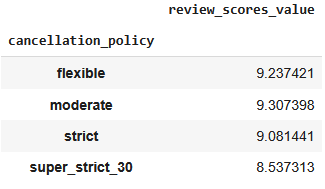



**.transform()** ise içine verdiğin işlemi dfteki bütün sayısal sütunlar (veya belirtilen sütunlar) için yapıyor, orijinal dfteki indexlere göre o işlemi yerleştiriyor. Bu sayede yeni oluşturulan bu df orijinal dfe eklenebiliyor.

```
transform_df = df[cols].groupby("cancellation_policy").transform(np.nanmean)
transform_df.rename({"review_scores_value":"mean_review_scores"},axis="columns",inplace=True)
df = df.merge(transform_df, left_index=True,right_index=True)
```
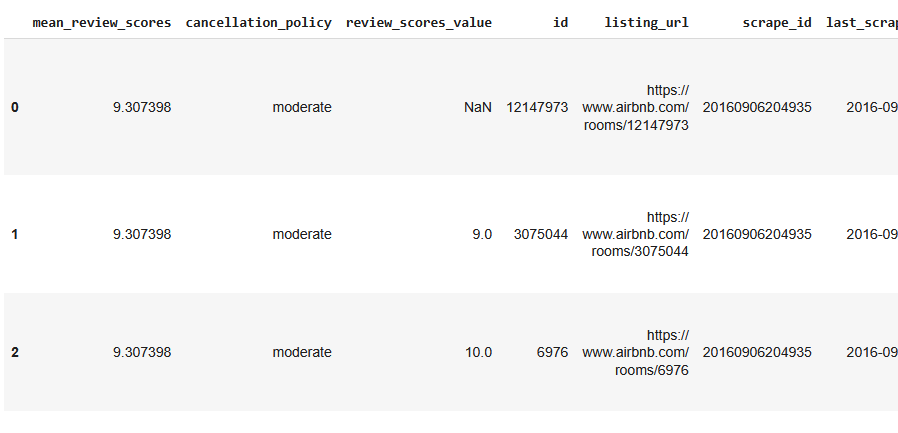


**.filter()** ise içine aldığı fonksiyona göre True veren gruplar df'te kalır False alan gruplar df'ten gider.
filter()'a verdiğin fonksiyon, her bir grubun tamamını (yani alt df'ini) girdi olarak alır. Fonksiyonun da o gruba ait tüm df için tek bir True veya False döndürmesi gerekir. Bu True/False değeri, o grubun tamamının sonuç df'inde kalıp kalmayacağını belirler.

```
df.groupby("cancellation_policy").filter(lambda x: np.nanmean(x["review_scores_value"])>9.2)

#önce cancellation policye göre grupladı, sonra o gruba göre ortalama 9.2 ise içeride tuttu (yani filterın içindeki fonksiyonu yine frame'e yapıyosun)
#ortalaması 9.2'den az olan cancellation_policye sahip veriler silindi
```



**apply()** içine bir fonksiyon alır ve bu fonksiyona her bir grubun df'ini (groupby()'a fonksiyon vermekle karıştırma, orada index değerleri üzerinden gruplama yapıyorduk) ayrı ayrı verir. Sonuç olarak yeni bir df verir. Bu df'in şekli, apply()'a verdiğin fonksiyonun ne döndürdüğüne göre değişebilir.

```
def calc_mean_review_scores(group_df):
    #group_df burada her bir groupa ait df mesela ilk loopta moderate olanları içeren bi df beklerim
    avg = np.nanmean(group_df["review_scores_value"])
    group_df["review_scores_mean"] = avg
    group_df["review_scores_mean_diff"] = np.abs(avg-group_df["review_scores_value"])

    return group_df
    

df.groupby('cancellation_policy').apply(calc_mean_review_scores,include_groups=False)
```



# **Scales**

1 sınıf ile 2. sınıf arasındaki bilgi farkıyla 2. sınıf ile 3. sınıf
arasındaki bilgi farkı eşit değil. Keza AA ile BA arasındaki not farkı ile de BA ile BB arasındaki not farkı eşit değil. Biz bunları anlarken sezgisel ölçekler kullanıyoruz.

Scale tipleri:
1. Oran ölçeği (ratio scale):
- ölçü birimleri eşit aralıklı
- gerçek bir sıfır noktası var
- matematiksel işlemleri yapabiliyosun
- mesela boyum 2 metre olsun 1 metre boya sahip maymundan 2 kat daha uzunum (gelir, yaş vs vs)

2. Aralık ölçeği (interval scale)
- ölçü birimleri eşit aralıklı
- gerçek bir sıfır noktası yok, sıfır demek yokluğu ifade etmez, sadece belirli bir değeri ifade eder
- matematiksel işlemler yapılamaz
- pusula yönü mesela, takvim yılı

3. Sıralı ölçek (ordinal scale)
- değerler arasındaki sıra önemli
- ölçü birimleri eşit aralıklı değil
- genelde matematiksel işlemler geçerli değildir, sıralama yapılabilir
- harf notları, memnuniyet derecesi, yarışma sıralamaları

4. Nominal ölçek (nominal scale) - categorical
- değerler arası hiçbir sıralama yok
- matematiksel işlem yok
- şehir, cinsiyet, göz rengi

In [ ]:
import pandas as pd

df=pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good',
                       'ok', 'ok', 'ok', 'poor', 'poor'],
               columns=["Grades"])

df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [ ]:
df.dtypes

,0
Grades,object


## Category objesi oluşturma

In [ ]:
#typeını category yapabiliriz
df["Grades"].astype("category")

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [ ]:
#verimiz aynı zamanda ordered bunu da df'e aktarabiliriz
#bir kategori objesi oluşturuyoruz
my_categories = pd.CategoricalDtype(categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'], ordered=True)

#bunu df'e aktarıyoruz
grades = df["Grades"].astype(my_categories)
print(grades.head())

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): ['D' < 'D+' < 'C-' < 'C' ... 'B+' < 'A-' < 'A' < 'A+']


In [ ]:
#mesela bu şekilde notu C'den yüksek olanları alabiliriz
grades[grades>"C"]

#bu işlemi böyle bi kategori yapmadan verseydik bize alphanumerical
#sıralama yapardı yani sadece C+ C- D+ ve D notlarını verirdi

#ayrıca max,min fonksiyonları da çalışır

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+


## Interval veya ratio scale olan veri setini categorical'a çevirme (harf notuna dönüştürme örneği)

In [ ]:
#interval veya ratio scale olan bişeyi categorical'a çevirme
#bir miktar bilgi kaybedilir ama bazı durumlarda yararlı olabilir ,
#görselleştirme için mesela, veya "0-50: Kaldı", "51-70: Geçti", "71-85: İyi", "86-100: Çok İyi" gibi
#makine öğrenimi için de önemli

import numpy as np

df = pd.read_csv("/content/census.csv")
df = df[df['SUMLEV']==50]

df = df.set_index("STNAME")

df = df.groupby(level=0)["CENSUS2010POP"].agg(np.average)
df.head()

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207


In [ ]:
#binler oluşturabiliriz cut() ile
pd.cut(df,10)
#mesela alabama ve alaska aynı kategoride oldu (11706.087, 75333.413] bu aralıkta

,CENSUS2010POP
STNAME,
Alabama,"(11706.087, 75333.413]"
Alaska,"(11706.087, 75333.413]"
Arizona,"(390320.176, 453317.529]"
Arkansas,"(11706.087, 75333.413]"
California,"(579312.234, 642309.586]"
Colorado,"(75333.413, 138330.766]"
Connecticut,"(390320.176, 453317.529]"
Delaware,"(264325.471, 327322.823]"
District of Columbia,"(579312.234, 642309.586]"


# **Pivot Table**

In [ ]:
#pivot table ile bir df'teki verileri özetleyebilirsin
#2 değişken arasındaki ilişkiyi görmeye yarıyor

import pandas as pd
import numpy as np

df = pd.read_csv("/content/cwurData.csv")
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [ ]:
#rank-level diye bir şey oluşturalım diyoruz,
#world-ranking 1-100 ise first tier 101-200 ise second-tier, 201-300 third-tier kalanı ise other top universities

#benim metodum
def ranking_tier(row):
  if int(row["world_rank"]) < 101:
    row["tier"] = "first tier"
  elif int(row["world_rank"]) < 201:
    row["tier"] = "second tier"
  elif int(row["world_rank"]) < 301:
    row["tier"] = "third tier"
  else:
    row["tier"] = "other top universities"

  return row

df = df.apply(ranking_tier,axis="columns")
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,tier
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012,first tier
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012,first tier
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012,first tier
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012,first tier
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012,first tier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015,other top universities
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015,other top universities
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015,other top universities
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015,other top universities


In [ ]:
#derste anlatılan çözüm
df = pd.read_csv("/content/cwurData.csv")

def create_category(ranking):
    # Since the rank is just an integer, I'll just do a bunch of if/elif statements
    if (ranking >= 1) & (ranking <= 100):
        return "First Tier Top Unversity"
    elif (ranking >= 101) & (ranking <= 200):
        return "Second Tier Top Unversity"
    elif (ranking >= 201) & (ranking <= 300):
        return "Third Tier Top Unversity"
    return "Other Top Unversity"


df["Rank Level"] = df["world_rank"].apply(lambda x: create_category(x))
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,Rank Level
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012,First Tier Top Unversity
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012,First Tier Top Unversity
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012,First Tier Top Unversity
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012,First Tier Top Unversity
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012,First Tier Top Unversity


In [ ]:
#ünilerin skorlarını ülkelerine göre karşılaştırmak istiyosun diyelim ki

df.pivot_table(values="score",index="country",columns="Rank Level",aggfunc=[np.mean]).head()
#index dediğin neye göre sıralanacağı
#values dediğin verilen işlemin neye uygulanacağı yani hangi veriyi karşılaştıracaksın
#columns ise yukarıya koyacağımız (yani sütun isimleri)
#aggfunc ise valueslara yapılacak işlem

#burada baktığımız şey üniversitelerin skorları ile tierları arasında nasıl bi ilişki var

/tmp/ipython-input-52-2183679585.py:3: FutureWarning: The provided callable <function mean at 0x79e5c37ea3e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(values="score",index="country",columns="Rank Level",aggfunc=[np.mean]).head()


mean                      \
Rank Level First Tier Top Unversity Other Top Unversity   
country                                                   
Argentina                       NaN           44.672857   
Australia                   47.9425           44.645750   
Austria                         NaN           44.864286   
Belgium                     51.8750           45.081000   
Brazil                          NaN           44.499706   

                                                               
Rank Level Second Tier Top Unversity Third Tier Top Unversity  
country                                                        
Argentina                        NaN                      NaN  
Australia                    49.2425                47.285000  
Austria                          NaN                47.066667  
Belgium                      49.0840                46.746667  
Brazil                       49.5650                      NaN

In [ ]:
#birden çok işlem de yapılabilir
df.pivot_table(values="score",index="country",columns="Rank Level",aggfunc = [np.mean,np.max]).head()

/tmp/ipython-input-55-1420396091.py:2: FutureWarning: The provided callable <function mean at 0x79e5c37ea3e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(values="score",index="country",columns="Rank Level",aggfunc = [np.mean,np.max]).head()
/tmp/ipython-input-55-1420396091.py:2: FutureWarning: The provided callable <function max at 0x79e5c37e99e0> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.pivot_table(values="score",index="country",columns="Rank Level",aggfunc = [np.mean,np.max]).head()


mean                      \
Rank Level First Tier Top Unversity Other Top Unversity   
country                                                   
Argentina                       NaN           44.672857   
Australia                   47.9425           44.645750   
Austria                         NaN           44.864286   
Belgium                     51.8750           45.081000   
Brazil                          NaN           44.499706   

                                                               \
Rank Level Second Tier Top Unversity Third Tier Top Unversity   
country                                                         
Argentina                        NaN                      NaN   
Australia                    49.2425                47.285000   
Austria                          NaN                47.066667   
Belgium                      49.0840                46.746667   
Brazil                       49.5650                      NaN   

                                max                      \
Rank Level First Tier Top Unversity Other Top Unversity   
country                                                   
Argentina                       NaN               45.66   
Australia                     51.61               45.97   
Austria                         NaN               46.29   
Belgium                       52.03               46.21   
Brazil                          NaN               46.08   

                                                               
Rank Level Second Tier Top Unversity Third Tier Top Unversity  
country                                                        
Argentina                        NaN                      NaN  
Australia                      50.40                    47.47  
Austria                          NaN                    47.78  
Belgium                        49.73                    47.14  
Brazil                         49.82                      NaN

In [ ]:
df.pivot_table(values="score",index="country",columns="Rank Level",aggfunc = [np.mean,np.max],margins=True)

#margins ekleyince sol kısım için mean işlemini bütün tierlara
#sağ kısım için de max işlemini bütün tierlara yapmış
#ayrıca en altta da mesela first tear için bir mean var

/tmp/ipython-input-57-2552974745.py:1: FutureWarning: The provided callable <function mean at 0x79e5c37ea3e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(values="score",index="country",columns="Rank Level",aggfunc = [np.mean,np.max],margins=True)
/tmp/ipython-input-57-2552974745.py:1: FutureWarning: The provided callable <function mean at 0x79e5c37ea3e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(values="score",index="country",columns="Rank Level",aggfunc = [np.mean,np.max],margins=True)
/tmp/ipython-input-57-2552974745.py:1: FutureWarning: The provided callable <function mean at 0x79e5c37ea3e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will 

mean                      \
Rank Level           First Tier Top Unversity Other Top Unversity   
country                                                             
Argentina                                 NaN           44.672857   
Australia                           47.942500           44.645750   
Austria                                   NaN           44.864286   
Belgium                             51.875000           45.081000   
Brazil                                    NaN           44.499706   
Bulgaria                                  NaN           44.335000   
Canada                              53.633846           44.760541   
Chile                                     NaN           44.767500   
China                               53.592500           44.564267   
Colombia                                  NaN           44.432500   
Croatia                                   NaN           44.770000   
Cyprus                                    NaN           44.210000   
Czech Republic                            NaN           44.587778   
Denmark                             49.180000           45.177500   
Egypt                                     NaN           44.230000   
Estonia                                   NaN           44.810000   
Finland                             44.415000           45.062500   
France                              51.914444           44.609028   
Germany                             49.153636           44.978305   
Greece                                    NaN           44.854286   
Hong Kong                                 NaN           45.284286   
Hungary                                   NaN           44.603333   
Iceland                                   NaN           44.980000   
India                                     NaN           44.713226   
Iran                                      NaN           44.270000   
Ireland                                   NaN           44.542500   
Israel                              56.307143           45.013333   
Italy                               48.736667           44.964177   
Japan                               58.812692           44.641583   
Lebanon                                   NaN           44.655000   
Lithuania                                 NaN           44.355000   
Malaysia                                  NaN           45.008333   
Mexico                                    NaN           45.102500   
Netherlands                         48.378333           45.163333   
New Zealand                               NaN           44.832000   
Norway                              47.056667           44.950000   
Poland                                    NaN           44.497222   
Portugal                                  NaN           44.717273   
Puerto Rico                               NaN           44.175000   
Romania                                   NaN           44.133333   
Russia                              51.846667           44.462500   
Saudi Arabia                              NaN           44.511250   
Serbia                                    NaN           44.420000   
Singapore                           50.720000                 NaN   
Slovak Republic                           NaN           44.490000   
Slovenia                                  NaN           44.615000   
South Africa                              NaN           45.246667   
South Korea                         55.990000           44.805714   
Spain                                     NaN           44.724730   
Sweden                              50.672000           45.272500   
Switzerland                         54.005000           44.625000   
Taiwan                              54.210000           44.476667   
Thailand                                  NaN           44.830000   
Turkey                                    NaN           44.481000   
USA                                 61.066726           44.871718   
Uganda                                 

In [ ]:
new_df = df.pivot_table(values='score', index='country', columns='Rank Level', aggfunc=[np.mean, np.max], margins=True)
print(new_df.index)
print(new_df.columns)

Index(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Egypt', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Iran',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania',
       'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Puerto Rico', 'Romania', 'Russia', 'Saudi Arabia',
       'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Africa',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand',
       'Turkey', 'USA', 'Uganda', 'United Arab Emirates', 'United Kingdom',
       'Uruguay', 'All'],
      dtype='object', name='country')
MultiIndex([('mean',  'First Tier Top Unversity'),
            ('mean',       'Other Top Unversity'),
            ('mean', 'Second Tier Top Unversity'),
            ('mean',  'Third T

/tmp/ipython-input-68-4028686656.py:1: FutureWarning: The provided callable <function mean at 0x79e5c37ea3e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  new_df = df.pivot_table(values='score', index='country', columns='Rank Level', aggfunc=[np.mean, np.max], margins=True)
/tmp/ipython-input-68-4028686656.py:1: FutureWarning: The provided callable <function mean at 0x79e5c37ea3e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  new_df = df.pivot_table(values='score', index='country', columns='Rank Level', aggfunc=[np.mean, np.max], margins=True)
/tmp/ipython-input-68-4028686656.py:1: FutureWarning: The provided callable <function mean at 0x79e5c37ea3e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the

In [ ]:
new_df["mean"]["First Tier Top Unversity"]

,First Tier Top Unversity
country,
Argentina,NaN
Australia,47.942500
Austria,NaN
Belgium,51.875000
Brazil,NaN
Bulgaria,NaN
Canada,53.633846
Chile,NaN
China,53.592500


In [ ]:
#peki first tier top university'de max skoru olan ülkeyi nasıl buluruz?
new_df["mean"]["First Tier Top Unversity"].idxmax()

'United Kingdom'

In [ ]:
new_df.head()

mean                      \
Rank Level First Tier Top Unversity Other Top Unversity   
country                                                   
Argentina                       NaN           44.672857   
Australia                   47.9425           44.645750   
Austria                         NaN           44.864286   
Belgium                     51.8750           45.081000   
Brazil                          NaN           44.499706   

                                                                          \
Rank Level Second Tier Top Unversity Third Tier Top Unversity        All   
country                                                                    
Argentina                        NaN                      NaN  44.672857   
Australia                    49.2425                47.285000  45.825517   
Austria                          NaN                47.066667  45.139583   
Belgium                      49.0840                46.746667  47.011000   
Brazil                       49.5650                      NaN  44.781111   

                                max                      \
Rank Level First Tier Top Unversity Other Top Unversity   
country                                                   
Argentina                       NaN               45.66   
Australia                     51.61               45.97   
Austria                         NaN               46.29   
Belgium                       52.03               46.21   
Brazil                          NaN               46.08   

                                                                      
Rank Level Second Tier Top Unversity Third Tier Top Unversity    All  
country                                                               
Argentina                        NaN                      NaN  45.66  
Australia                      50.40                    47.47  51.61  
Austria                          NaN                    47.78  47.78  
Belgium                        49.73                    47.14  52.03  
Brazil                         49.82                      NaN  49.82

In [ ]:
new_df = new_df.stack()
new_df.head(10)
#böyle yapınca Rank-levellar multilevelindexin ikinci indexi oldu
#ayrıca NaN değerleri yazmadı

/tmp/ipython-input-69-1237878571.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  new_df = new_df.stack()


mean    max
country   Rank Level                                 
Argentina Other Top Unversity        44.672857  45.66
          All                        44.672857  45.66
Australia First Tier Top Unversity   47.942500  51.61
          Other Top Unversity        44.645750  45.97
          Second Tier Top Unversity  49.242500  50.40
          Third Tier Top Unversity   47.285000  47.47
          All                        45.825517  51.61
Austria   Other Top Unversity        44.864286  46.29
          Third Tier Top Unversity   47.066667  47.78
          All                        45.139583  47.78

In [ ]:
new_df.unstack().head(10)

mean                      \
Rank Level First Tier Top Unversity Other Top Unversity   
country                                                   
All                       58.350675           44.738871   
Argentina                       NaN           44.672857   
Australia                 47.942500           44.645750   
Austria                         NaN           44.864286   
Belgium                   51.875000           45.081000   
Brazil                          NaN           44.499706   
Bulgaria                        NaN           44.335000   
Canada                    53.633846           44.760541   
Chile                           NaN           44.767500   
China                     53.592500           44.564267   

                                                                          \
Rank Level Second Tier Top Unversity Third Tier Top Unversity        All   
country                                                                    
All                        49.065450                46.843450  47.798395   
Argentina                        NaN                      NaN  44.672857   
Australia                  49.242500                47.285000  45.825517   
Austria                          NaN                47.066667  45.139583   
Belgium                    49.084000                46.746667  47.011000   
Brazil                     49.565000                      NaN  44.781111   
Bulgaria                         NaN                      NaN  44.335000   
Canada                     49.218182                46.826364  47.359306   
Chile                            NaN                      NaN  44.767500   
China                      47.868000                46.926250  44.992575   

                                max                      \
Rank Level First Tier Top Unversity Other Top Unversity   
country                                                   
All                          100.00               46.34   
Argentina                       NaN               45.66   
Australia                     51.61               45.97   
Austria                         NaN               46.29   
Belgium                       52.03               46.21   
Brazil                          NaN               46.08   
Bulgaria                        NaN               44.48   
Canada                        60.87               45.74   
Chile                           NaN               45.33   
China                         55.30               45.92   

                                                                       
Rank Level Second Tier Top Unversity Third Tier Top Unversity     All  
country                                                                
All                            51.29                    47.93  100.00  
Argentina                        NaN                      NaN   45.66  
Australia                      50.40                    47.47   51.61  
Austria                          NaN                    47.78   47.78  
Belgium                        49.73                    47.14   52.03  
Brazil                         49.82                      NaN   49.82  
Bulgaria                         NaN                      NaN   44.48  
Canada                         51.23                    47.69   60.87  
Chile                            NaN                      NaN   45.33  
China                          48.14                    47.76   55.30

In [ ]:
#bir daha unstack yapsaydık nolurdu?
new_df.unstack().unstack().head(10)
#bu sefer 3lü indexing yaptı mean rank_level country sırasıyla

Rank Level                country  
mean  First Tier Top Unversity  All          58.350675
                                Argentina          NaN
                                Australia    47.942500
                                Austria            NaN
                                Belgium      51.875000
                                Brazil             NaN
                                Bulgaria           NaN
                                Canada       53.633846
                                Chile              NaN
                                China        53.592500
dtype: float64

# **Date/Time Functionality**

Timestamp

In [ ]:
import pandas as pd
import numpy as np

pd.Timestamp("9/1/2019 10:05AM")

Timestamp('2019-09-01 10:05:00')

In [ ]:
pd.Timestamp(2019,12,20,15,20)

Timestamp('2019-12-20 15:20:00')

In [ ]:
#isoweekday() ile hangi gün olduğunu bul
pd.Timestamp(2019,12,20,15,20).isoweekday()
#5 cuma demek

5

In [ ]:
pd.Timestamp(2019,12,20,15,20).year

2019

Period

In [ ]:
pd.Period("1/2016")

Period('2016-01', 'M')

In [ ]:
pd.Period("3.5.2016")

Period('2016-03-05', 'D')

In [ ]:
pd.Period("6/2025") + 3

Period('2025-09', 'M')

DatetimeIndex and PeriodIndex

In [ ]:
t1 = pd.Series(list("abc"), [pd.Timestamp("2016-09-01"),pd.Timestamp("2016-09-02"),pd.Timestamp("2016-09-03")])

t1

,0
2016-09-01,a
2016-09-02,b
2016-09-03,c


In [ ]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'),
                             pd.Period('2016-11')])
t2

,0
2016-09,d
2016-10,e
2016-11,f


In [ ]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

Converting to Datetime

In [ ]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']

ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1,
                   columns=list('ab'))
ts3

,a,b
2 June 2013,58,29
"Aug 29, 2014",87,24
2015-06-26,82,70
7/12/16,57,90


In [ ]:
ts3.index = pd.to_datetime(ts3.index,format='mixed')
ts3

,a,b
2013-06-02,58,29
2014-08-29,87,24
2015-06-26,82,70
2016-07-12,57,90


In [ ]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

Timedelta

In [ ]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [ ]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3h')

Timestamp('2016-09-14 11:10:00')

Offset

In [ ]:
 pd.Timestamp('9/4/2016').weekday()

6

In [ ]:
pd.Timestamp('9/4/2016') + pd.offsets.Week()

Timestamp('2016-09-11 00:00:00')

In [ ]:
pd.Timestamp('9/4/2016') + pd.offsets.MonthEnd()

Timestamp('2016-09-30 00:00:00')

Working with Dates in a Dataframe

In [ ]:
# Next, let's look at a few tricks for working with dates in a DataFrame. Suppose we want to look at nine
# measurements, taken bi-weekly, every Sunday, starting in October 2016. Using date_range, we can create this
# DatetimeIndex. In data_range, we have to either specify the start or end date. If it is not explicitly
# specified, by default, the date is considered the start date. Then we have to specify number of periods, and
# a frequency. Here, we set it to "2W-SUN", which means biweekly on Sunday

dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [ ]:
# There are many other frequencies that you can specify. For example, you can do business day
pd.date_range('10-01-2016', periods=9, freq='B')

DatetimeIndex(['2016-10-03', '2016-10-04', '2016-10-05', '2016-10-06',
               '2016-10-07', '2016-10-10', '2016-10-11', '2016-10-12',
               '2016-10-13'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
# Or you can do quarterly, with the quarter start in June
pd.date_range('04-01-2016', periods=12, freq='QS-JUN')

DatetimeIndex(['2016-06-01', '2016-09-01', '2016-12-01', '2017-03-01',
               '2017-06-01', '2017-09-01', '2017-12-01', '2018-03-01',
               '2018-06-01', '2018-09-01', '2018-12-01', '2019-03-01'],
              dtype='datetime64[ns]', freq='QS-JUN')

In [ ]:
# Now, let's go back to our weekly on Sunday example and create a DataFrame using these dates, and some random
# data, and see what we can do with it.

dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,101,122
2016-10-16,99,123
2016-10-30,99,129
2016-11-13,95,123
2016-11-27,98,119
2016-12-11,98,118
2016-12-25,97,120
2017-01-08,99,123
2017-01-22,101,119


In [ ]:
df.index.weekday

Index([6, 6, 6, 6, 6, 6, 6, 6, 6], dtype='int32')

In [ ]:
# We can also use diff() to find the difference between each date's value.
df.diff()

#mesela ikinci satırda şunu yapmış 2.satır - 1.satır

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,9.0,-4.0
2016-10-30,6.0,9.0
2016-11-13,1.0,-2.0
2016-11-27,-4.0,-6.0
2016-12-11,-1.0,1.0
2016-12-25,5.0,1.0
2017-01-08,0.0,-2.0
2017-01-22,4.0,-3.0


In [ ]:
# Suppose we want to know what the mean count is for each month in our DataFrame. We can do this using
# resample. Converting from a higher frequency from a lower frequency is called downsampling (we'll talk about
# this in a moment)
df.resample('M').mean()

/tmp/ipython-input-112-3536230891.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').mean()


,Count 1,Count 2
2016-10-31,105.0,124.333333
2016-11-30,111.0,124.000000
2016-12-31,110.5,122.500000
2017-01-31,115.0,119.500000


In [ ]:
df.loc['2017']

,Count 1,Count 2
2017-01-08,109,120
2017-01-22,116,128


In [ ]:
df.loc['2016-12']

,Count 1,Count 2
2016-12-11,103,124
2016-12-25,104,124


In [ ]:
df.loc['2016-12':]

,Count 1,Count 2
2016-12-11,103,124
2016-12-25,104,124
2017-01-08,109,120
2017-01-22,116,128


In [ ]:
df.loc['2016']

,Count 1,Count 2
2016-10-02,102,124
2016-10-16,108,122
2016-10-30,104,120
2016-11-13,99,123
2016-11-27,105,119
2016-12-11,103,124
2016-12-25,104,124


# Basic Statistical Testing
Hypothesis testing: deneydeki iki farklı koşul farklı sonuçlara yol açtı mı?

Birincisi bizim gerçek açıklamamız, ikincisi ise alternatif hipotez, buna null hypothesis deniyor. Amaç null hypothesis doğru mu değil mi bulmak.

In [ ]:
import numpy as np
import pandas as pd

from scipy import stats

df = pd.read_csv("/content/grades.csv")
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [ ]:
print("There are {} rows and {} columns".format(df.shape[0],df.shape[1]))

There are 2315 rows and 13 columns


In [ ]:
early_finishers = df[pd.to_datetime(df["assignment1_submission"]) < "2016"]
early_finishers.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000
5,D09000A0-827B-C0FF-3433-BF8FF286E15B,71.647278,2015-12-28 04:35:32.836000000,64.052550,2016-01-03 21:05:38.392000000,64.752550,2016-01-07 08:55:43.692000000,57.467295,2016-01-11 00:45:28.706000000,57.467295,2016-01-11 00:54:13.579000000,57.467295,2016-01-20 19:54:46.166000000
8,C9D51293-BD58-F113-4167-A7C0BAFCB6E5,66.595568,2015-12-25 02:29:28.415000000,52.916454,2015-12-31 01:42:30.046000000,48.344809,2016-01-05 23:34:02.180000000,47.444809,2016-01-02 07:48:42.517000000,37.955847,2016-01-03 21:27:04.266000000,37.955847,2016-01-19 15:24:31.060000000


In [ ]:
#late_finishers = df[pd.to_datetime(df["assignment1_submission"]) > "2016"] bu şekilde de yapılabilir
late_finishers = df[~df.index.isin(early_finishers.index)]
#şimdi burada df.index.isin(early_finishers.index) kısmı bize kocaman bir True False içeren df verecek
#early finisher da olan indexler True olacak
#~ ise bu df'i tam ters hale çeviriyor Truelar False, Falselar True oluyor
late_finishers.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
6,3217BE3F-E4B0-C3B6-9F64-462456819CE4,87.498744,2016-03-05 11:05:25.408000000,69.998995,2016-03-09 07:29:52.405000000,55.999196,2016-03-16 22:31:24.316000000,50.399276,2016-03-18 07:19:26.032000000,45.359349,2016-03-19 10:35:41.869000000,45.359349,2016-03-23 14:02:00.987000000
7,F1CB5AA1-B3DE-5460-FAFF-BE951FD38B5F,80.576090,2016-01-24 18:24:25.619000000,72.518481,2016-01-27 13:37:12.943000000,65.266633,2016-01-30 14:34:36.581000000,65.266633,2016-02-03 22:08:49.002000000,65.266633,2016-02-16 14:22:23.664000000,65.266633,2016-02-18 08:35:04.796000000
9,E2C617C2-4654-622C-AB50-1550C4BE42A0,59.270882,2016-03-06 12:06:26.185000000,59.270882,2016-03-13 02:07:25.289000000,53.343794,2016-03-17 07:30:09.241000000,53.343794,2016-03-20 21:45:56.229000000,42.675035,2016-03-27 15:55:04.414000000,38.407532,2016-03-30 20:33:13.554000000


In [ ]:
print(early_finishers["assignment1_grade"].mean())
print(late_finishers["assignment1_grade"].mean())

# Şimdi ana hipotezimiz (ödevi geç yükleyenlerle ödev puanı arasında ilişki var)
# doğru mu değil mi buradan anlamıyoruz.
# Aradaki 0.9'luk fark önemli mi değil mi?
# Null hypothesis'i düşünelim (iki ortalama aynı).
# Bunu anlamak için t-test kullanacağız, bu şekilde aradaki fark
# önemli mi anlayabiliriz. Öncelikle kendimize bir threshold belirleyelim
# mesela 0.05 olsun. Bu tamamen sallama bir seçim.

74.94728457024304
74.0450648477065


TtestResult(statistic=np.float64(1.3223540853721598), pvalue=np.float64(0.18618101101713855), df=np.float64(2313.0))

In [ ]:
# ttest_ind() fonksiyonu
from scipy.stats import ttest_ind

ttest_ind(early_finishers["assignment1_grade"],late_finishers["assignment1_grade"])

TtestResult(statistic=np.float64(1.3223540853721598), pvalue=np.float64(0.18618101101713855), df=np.float64(2313.0))

In [ ]:
# Burada gördüğümüz pvalue bu null hypothesis doğru olma ihtimali.
# pval yüksek demek bu iki veri setinin aynı olması demek
# Yani %18.6 ihtimalle null hipotezi doğru, %18.6 bizim belirlediğimiz
# %5'ten daha yüksek. Ama bu erken teslim edenlerle sonra teslim edenlerin
# aynı olduklarını göstermiyor.

# Diğerlerine de bakalım.
print(ttest_ind(early_finishers['assignment2_grade'], late_finishers['assignment2_grade']))
print(ttest_ind(early_finishers['assignment3_grade'], late_finishers['assignment3_grade']))
print(ttest_ind(early_finishers['assignment4_grade'], late_finishers['assignment4_grade']))
print(ttest_ind(early_finishers['assignment5_grade'], late_finishers['assignment5_grade']))
print(ttest_ind(early_finishers['assignment6_grade'], late_finishers['assignment6_grade']))

TtestResult(statistic=np.float64(1.2514717608216366), pvalue=np.float64(0.2108889627004424), df=np.float64(2313.0))
TtestResult(statistic=np.float64(1.6133726558705392), pvalue=np.float64(0.10679998102227865), df=np.float64(2313.0))
TtestResult(statistic=np.float64(0.049671157386456125), pvalue=np.float64(0.960388729789337), df=np.float64(2313.0))
TtestResult(statistic=np.float64(-0.05279315545404755), pvalue=np.float64(0.9579012739746492), df=np.float64(2313.0))
TtestResult(statistic=np.float64(-0.11609743352612056), pvalue=np.float64(0.9075854011989656), df=np.float64(2313.0))


In [ ]:
#
#

df1 = pd.DataFrame(np.random.random(100) for x in range(100)) #önemli bri kullanım
df1

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.824957,0.055190,0.375176,0.641215,0.445949,0.624891,0.482878,0.130792,0.355643,0.881059,...,0.073404,0.262573,0.118641,0.934831,0.846772,0.944460,0.511919,0.306903,0.688864,0.164402
1,0.863914,0.914524,0.302951,0.802096,0.261450,0.976630,0.611229,0.059823,0.333633,0.561631,...,0.460921,0.672362,0.895172,0.099882,0.144866,0.539729,0.357720,0.796473,0.210979,0.406361
2,0.070036,0.578085,0.202504,0.122352,0.293050,0.772900,0.657538,0.622313,0.623831,0.088747,...,0.643632,0.118462,0.912543,0.024212,0.338081,0.558809,0.330677,0.156709,0.247173,0.597697
3,0.795410,0.083105,0.846981,0.932762,0.315825,0.997395,0.961988,0.428943,0.419220,0.935909,...,0.899873,0.481576,0.083152,0.033237,0.248477,0.487176,0.108782,0.938374,0.719216,0.088651
4,0.967010,0.425207,0.302331,0.330325,0.942629,0.533976,0.634108,0.538363,0.734446,0.316025,...,0.077003,0.013959,0.378937,0.506257,0.825170,0.957931,0.903410,0.777925,0.133113,0.002981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.112715,0.467265,0.642205,0.341691,0.577424,0.145553,0.479147,0.446349,0.071860,0.089646,...,0.619803,0.595500,0.329972,0.050553,0.961436,0.460037,0.633044,0.113135,0.989400,0.841584
96,0.880904,0.851789,0.484221,0.026078,0.023133,0.910446,0.708359,0.343775,0.015754,0.680684,...,0.193325,0.162968,0.096564,0.728441,0.384668,0.188741,0.896328,0.453494,0.941949,0.455068
97,0.434731,0.875323,0.275588,0.258526,0.006844,0.362244,0.452404,0.020536,0.955625,0.429271,...,0.512762,0.915186,0.265748,0.535579,0.038250,0.264426,0.763051,0.644410,0.649420,0.342423
98,0.841772,0.444554,0.469896,0.565580,0.759779,0.671073,0.169006,0.456664,0.241081,0.852988,...,0.923529,0.076700,0.434423,0.383919,0.626662,0.892641,0.822409,0.499623,0.920544,0.334162


In [ ]:
df2 = pd.DataFrame(np.random.random(100) for x in range(100))

In [ ]:
# Bu iki df aynı mı? Bu sefer threshold değerimiz %10 olsun.

def test_columns(alpha=0.1):
  num_diff = 0
  for col in df1.columns:
    teststat,pval = ttest_ind(df1[col],df2[col])
    if pval <= alpha:
      print(f"Col {col} is statisticcally different at alpha = {alpha}, pval = {pval}")
      num_diff += 1

  print("Total number different was {} , which is {}%".format(num_diff,float(num_diff)/len(df1.columns)*100))

test_columns()

Col 2 is statisticcally different at alpha = 0.1, pval = 0.0751997940753392
Col 13 is statisticcally different at alpha = 0.1, pval = 0.060944330435037365
Col 19 is statisticcally different at alpha = 0.1, pval = 0.004488727591362072
Col 21 is statisticcally different at alpha = 0.1, pval = 0.03380948198557052
Col 36 is statisticcally different at alpha = 0.1, pval = 0.006781856887276303
Col 40 is statisticcally different at alpha = 0.1, pval = 0.01664577168564303
Col 41 is statisticcally different at alpha = 0.1, pval = 0.044611542246276406
Col 43 is statisticcally different at alpha = 0.1, pval = 0.07038585450217773
Col 50 is statisticcally different at alpha = 0.1, pval = 0.06079981158657217
Col 55 is statisticcally different at alpha = 0.1, pval = 0.04305897471703931
Col 68 is statisticcally different at alpha = 0.1, pval = 0.024299674276432374
Col 79 is statisticcally different at alpha = 0.1, pval = 0.0850195457024338
Col 83 is statisticcally different at alpha = 0.1, pval = 0.07

In [ ]:
# Tamamen random 100 tane column oluşturduğumuz için eğer alphamız %10 ise
# 10'unun benzer olmasını beklerdik zaten.

In [ ]:
test_columns(0.05)

Col 19 is statisticcally different at alpha = 0.05, pval = 0.004488727591362072
Col 21 is statisticcally different at alpha = 0.05, pval = 0.03380948198557052
Col 36 is statisticcally different at alpha = 0.05, pval = 0.006781856887276303
Col 40 is statisticcally different at alpha = 0.05, pval = 0.01664577168564303
Col 41 is statisticcally different at alpha = 0.05, pval = 0.044611542246276406
Col 55 is statisticcally different at alpha = 0.05, pval = 0.04305897471703931
Col 68 is statisticcally different at alpha = 0.05, pval = 0.024299674276432374
Total number different was 7 , which is 7.000000000000001%


In [12]:


df = pd.DataFrame([
    {'a':5,'b':6,'c':20},
    {'a':5,'b':82,'c':28},
    {'a':71,'b':31,'c':92},
    {'a':67,'b':37,'c':49}],
    index=['R1', 'R2', 'R3','R4'])
f = lambda x: x.max() + x.min()
df_new = df.apply(f)

df_new



,0
a,76
b,88
c,112
